In [7]:
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np

In [8]:
def approximation(nodes: list, m: int) -> Callable:
    b_k = [0] * m
    g_k = [0] * (2*m)   # 2*m instead m x m to reduce the number of calculations
    for x, y, w in nodes:
        for j in range(m):
            b_k[j] += w * y * x**j

    for x, _, w in nodes:
        for j in range(2*m):
            g_k[j] += w * x**j

    G = np.array([[g_k[i+j] for i in range(m)] for j in range(m)], dtype=np.float64)
    B = np.array(b_k, dtype=np.float64).reshape((-1, 1))
    A = np.linalg.solve(G, B)

    def f(x_):
        y_ = 0
        x_pow_i = 1     # to reduce the number of calculations
        for i in range(m):
            y_ += A[i][0] * x_pow_i
            x_pow_i *= x_

        return y_

    return f

In [9]:
def f_real(x):
    return np.exp(np.cos(x))

In [10]:
def range_evenly(start, stop, n: int):
    return np.linspace(start=start, stop=stop, num=n, dtype=np.longdouble)

In [11]:
START, STOP, N = -4 * np.pi, 4*np.pi, 500

In [12]:
x_real = range_evenly(START, STOP, N)
y_real = f_real(x_real)

In [13]:
def max_err(y):
    return max(abs(y-y_real))

def std_err(ys, k: int):
    s = sum([(y_r - y)**2 for y_r, y in zip(y_real, ys)])
    return 1/k * np.sqrt(s)

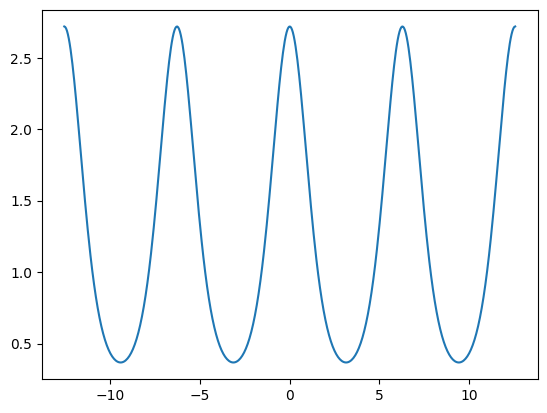

In [14]:
nodes_x = range_evenly(START, STOP, 500)
nodes_y = f_real(nodes_x)
plt.plot(x_real, nodes_y)
plt.show()

In [15]:
max_errors = []
std_errors = []

In [16]:
def test_approximation(no_points: int, m: int) -> None:
    nodes_x = range_evenly(START, STOP, no_points)
    nodes_y = f_real(nodes_x)

    nodes = list(zip(nodes_x, nodes_y, [1] * no_points))

    f = approximation(nodes, m)

    y_approx = f(x_real)

    max_errors[-1].append(max_err(y_approx))
    std_errors[-1].append(std_err(y_approx, N))

    plt.plot(x_real, y_approx)
    plt.scatter(nodes_x, nodes_y, c="orange")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Liczba punktów: {no_points}, Liczba funkcji w bazie: {m}")
    plt.show()

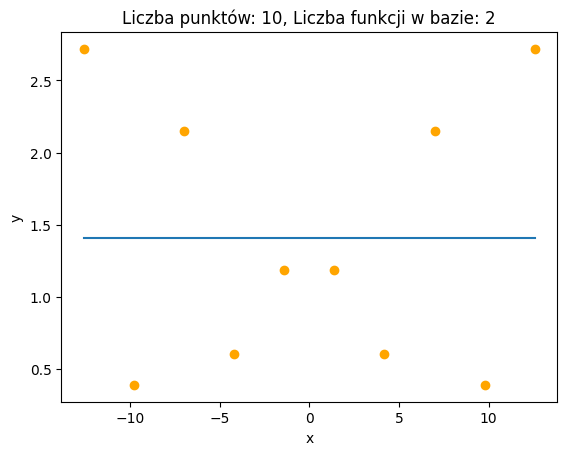

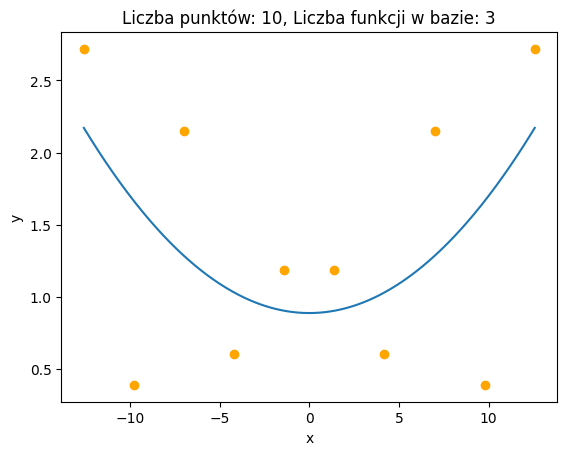

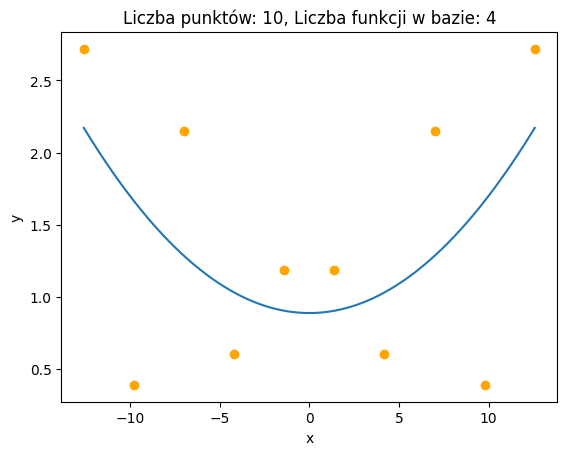

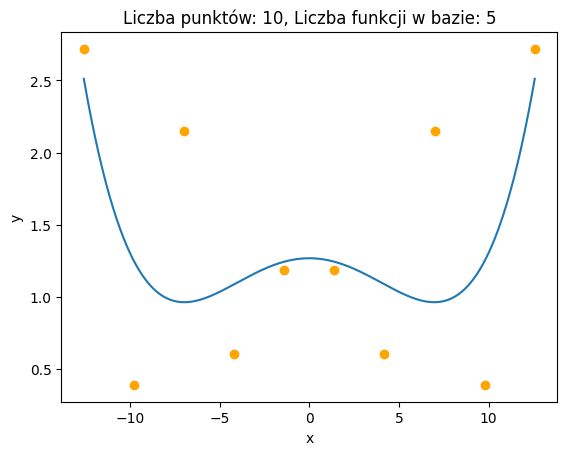

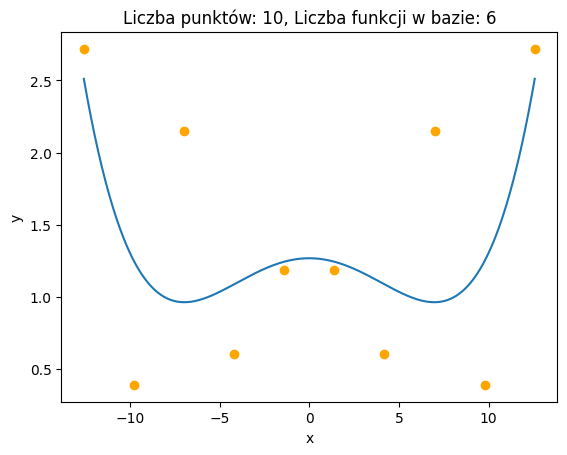

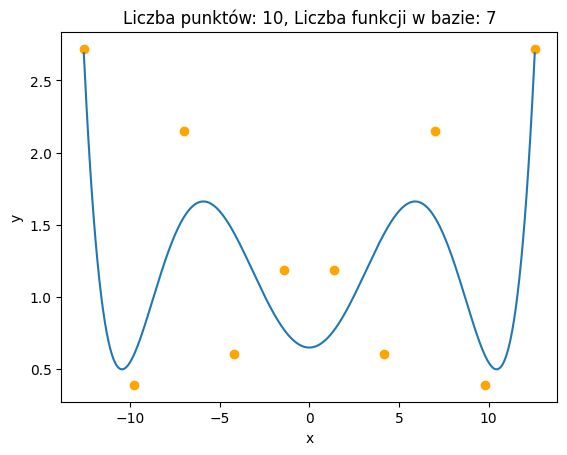

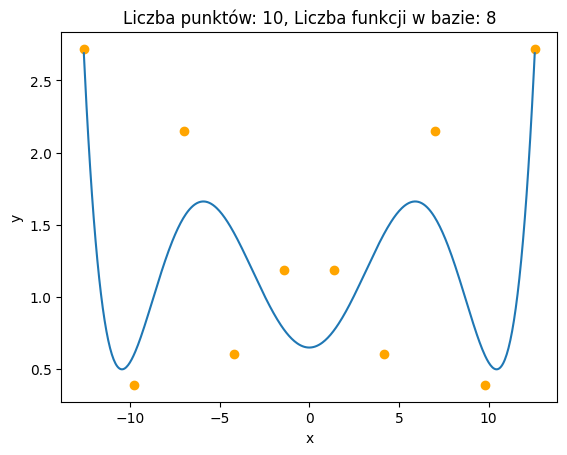

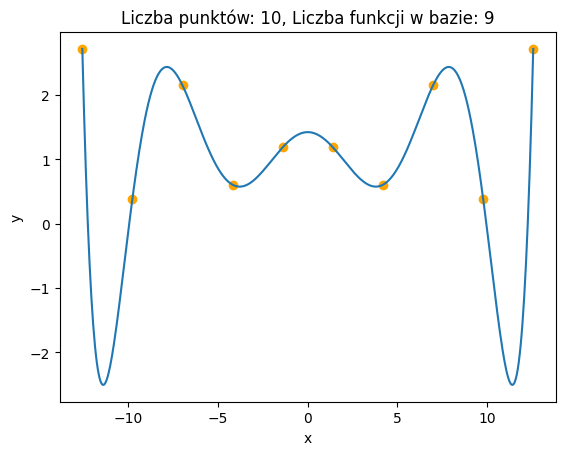

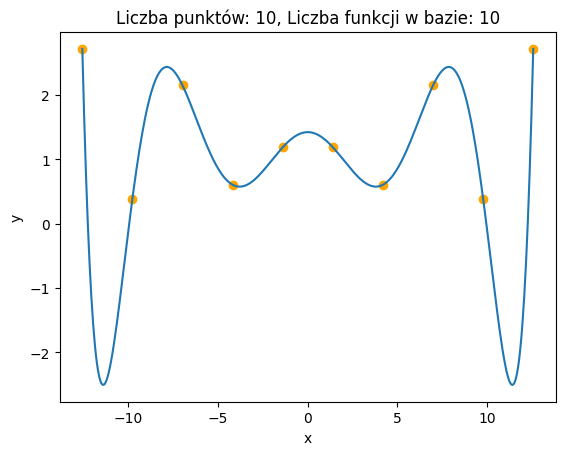

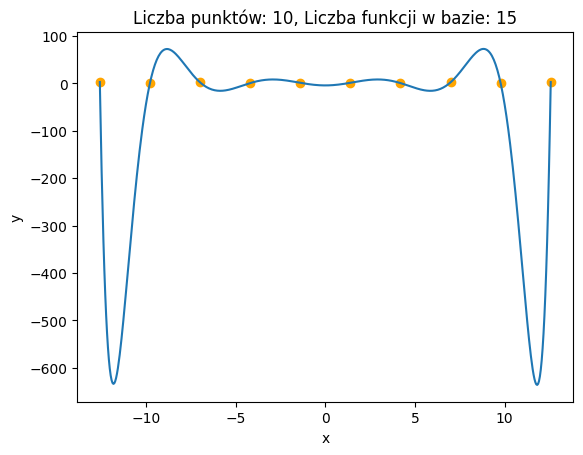

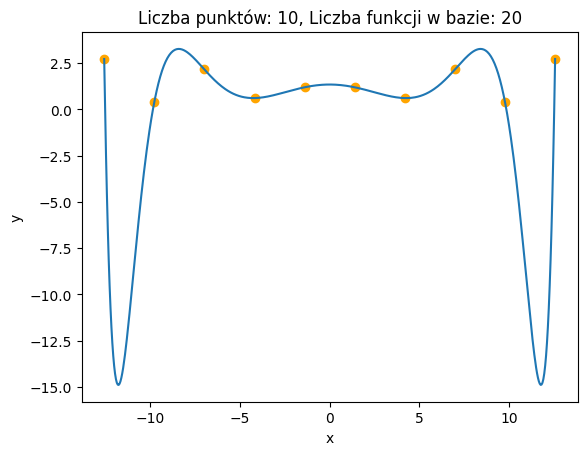

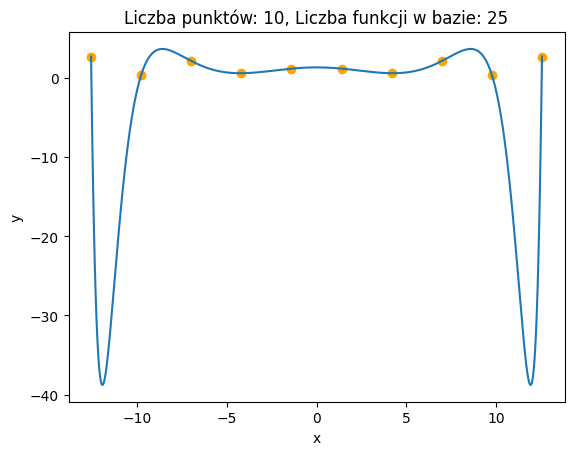

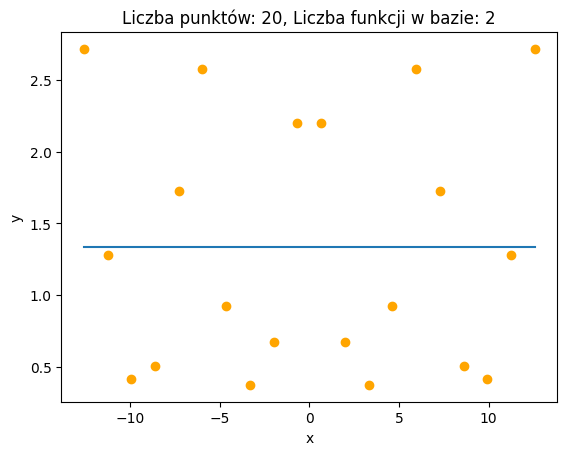

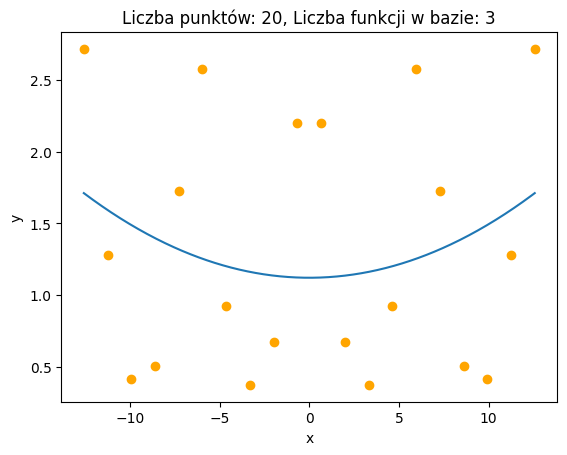

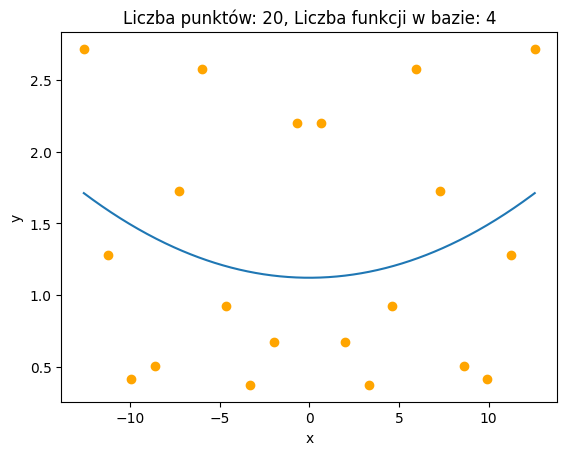

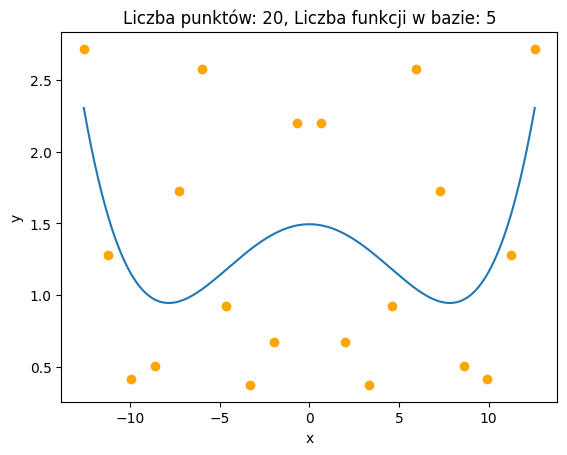

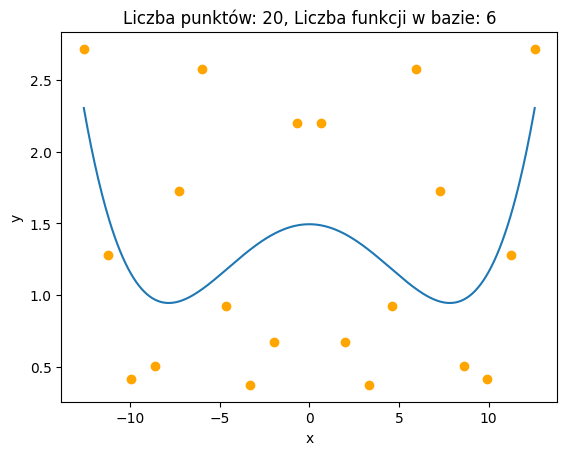

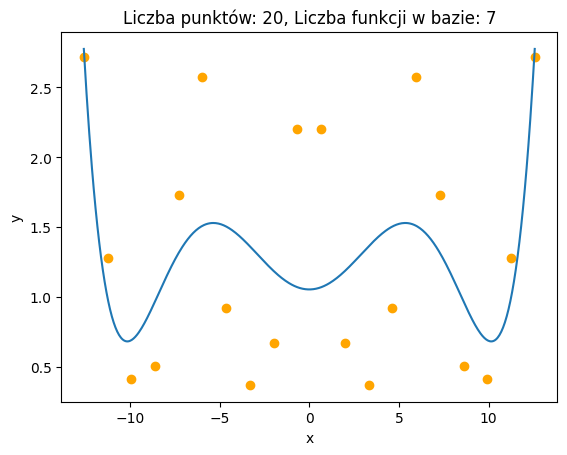

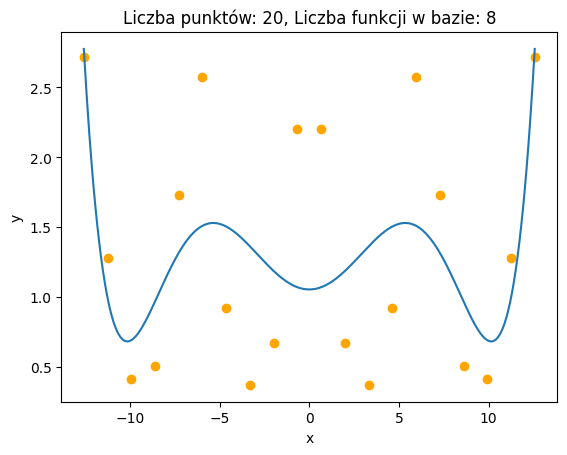

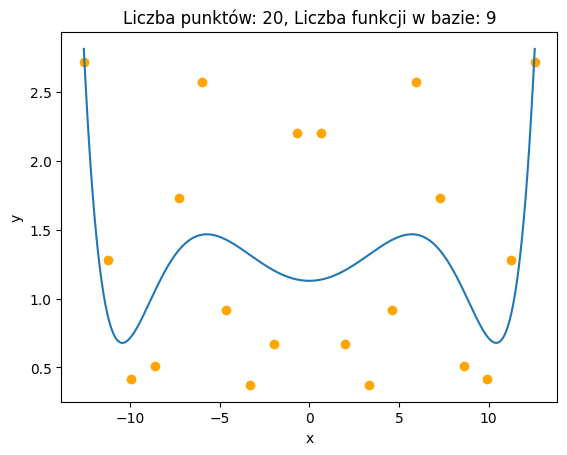

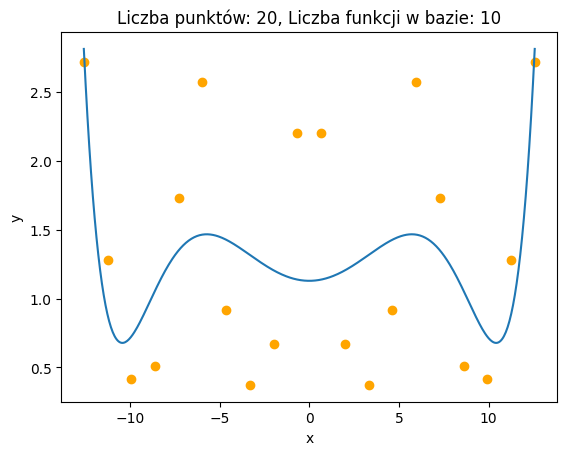

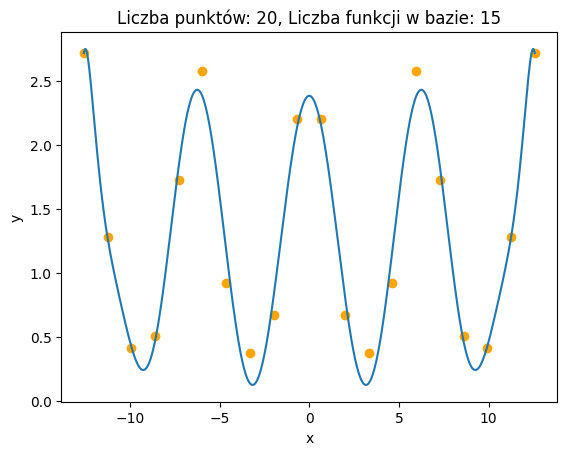

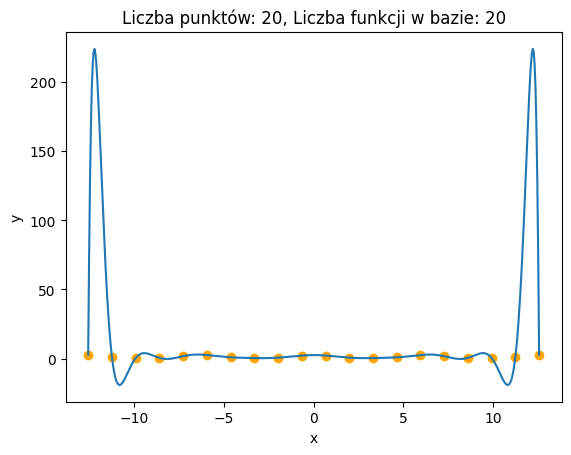

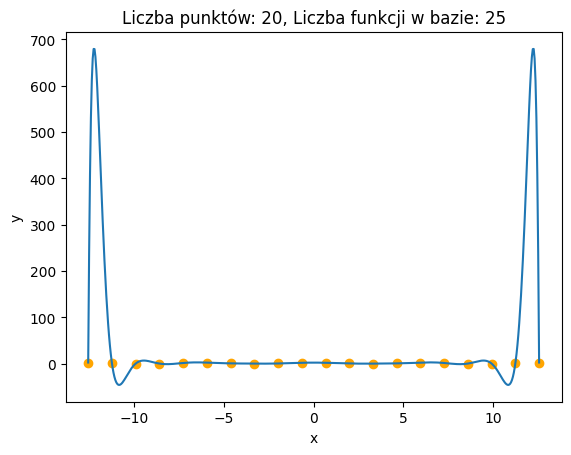

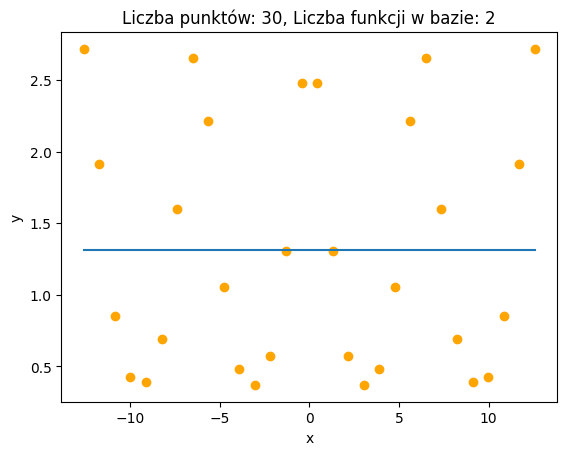

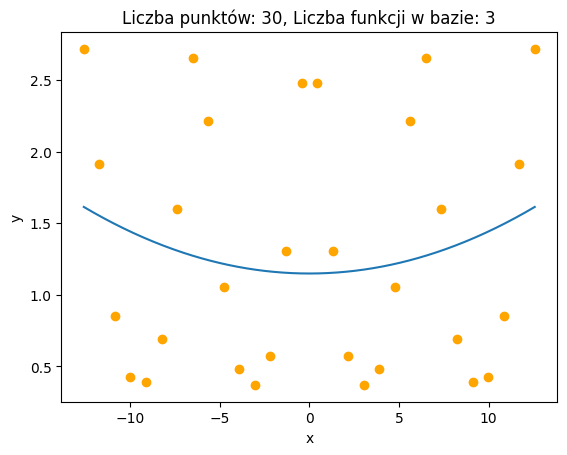

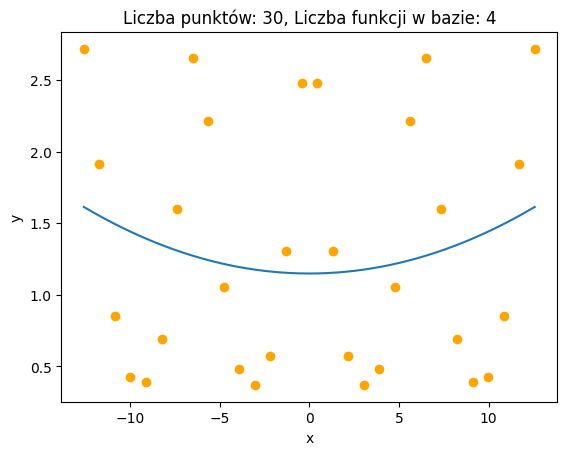

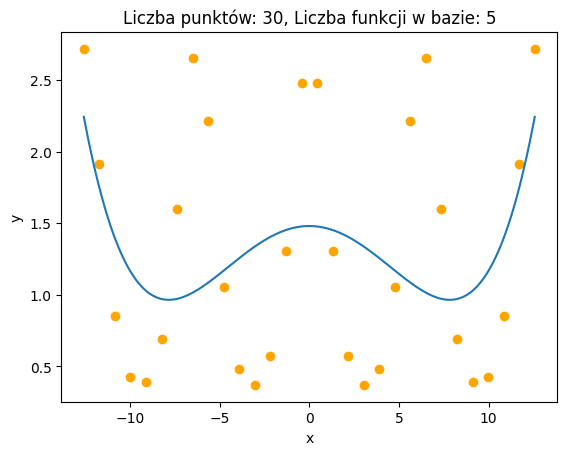

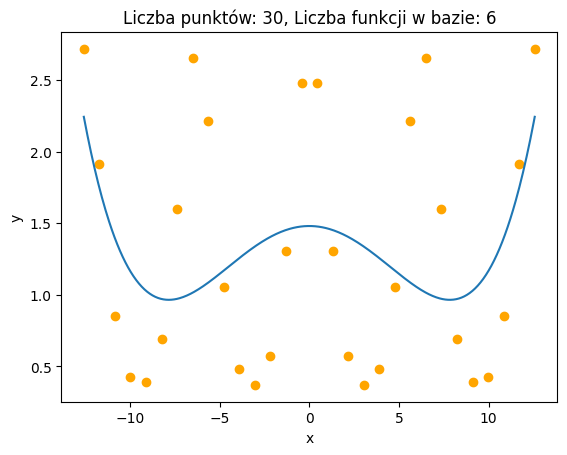

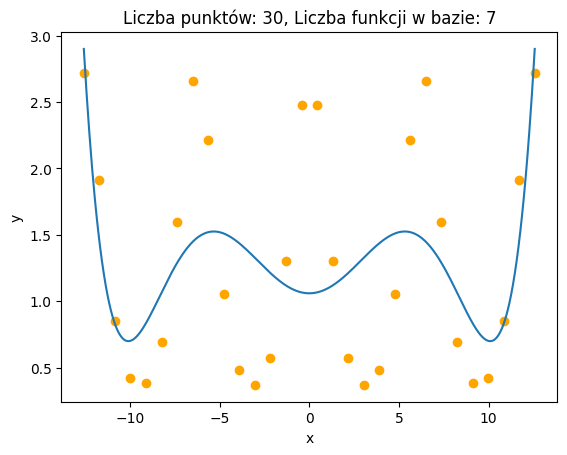

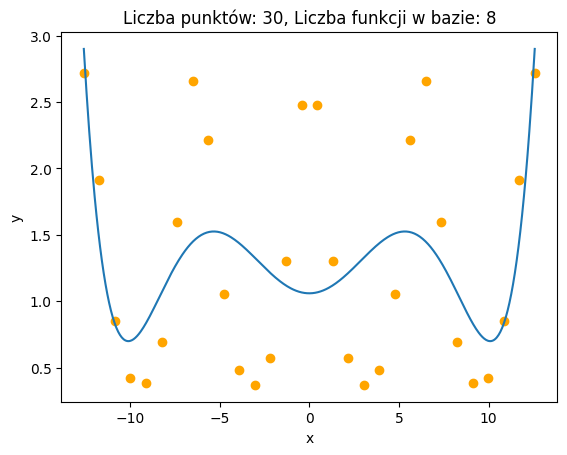

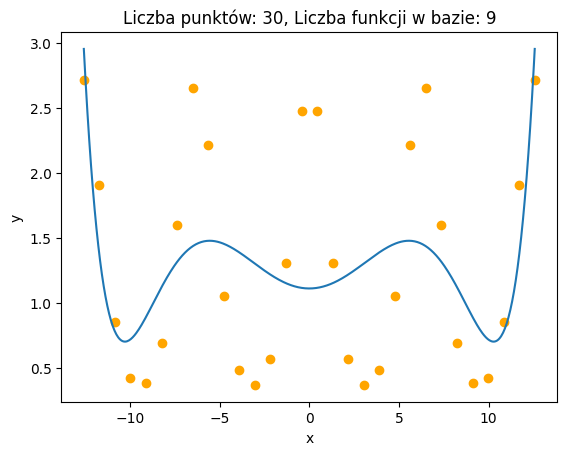

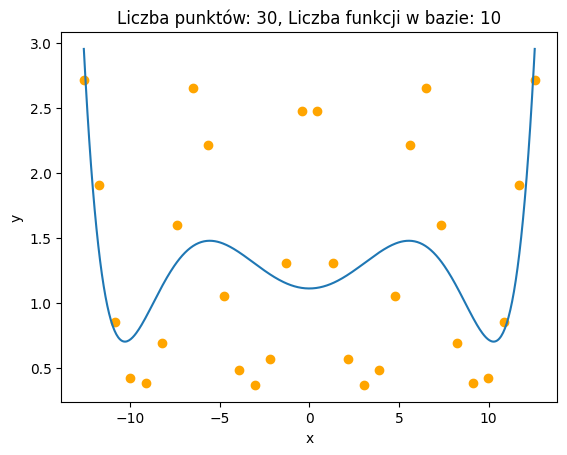

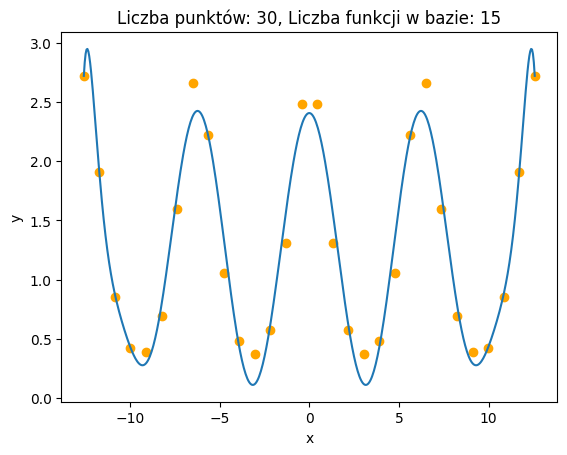

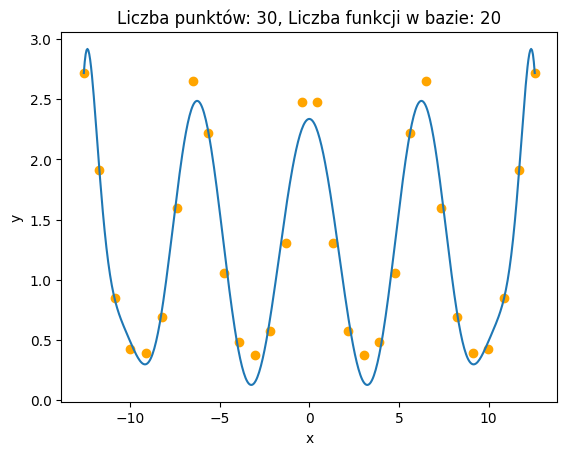

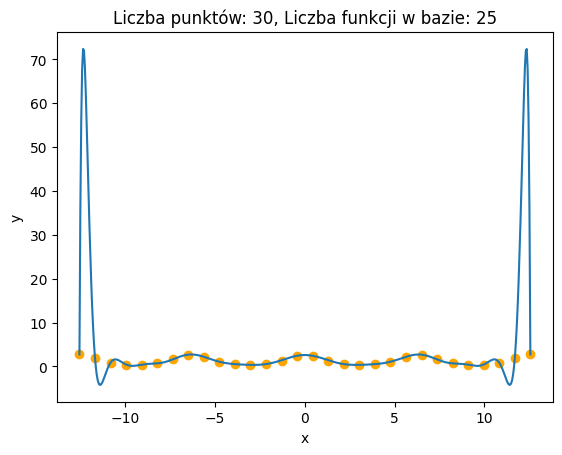

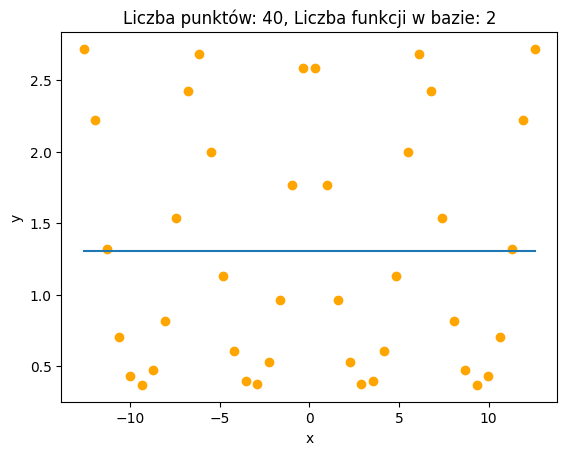

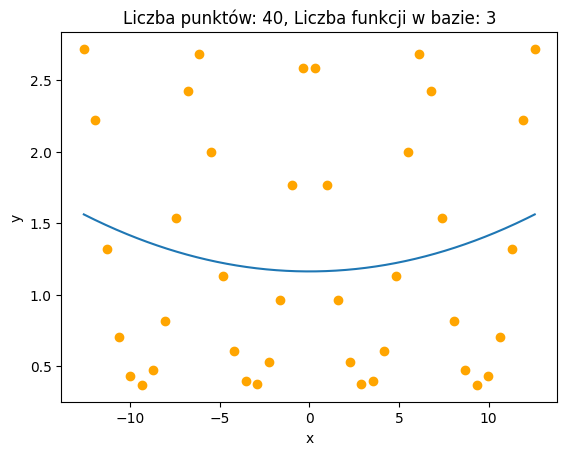

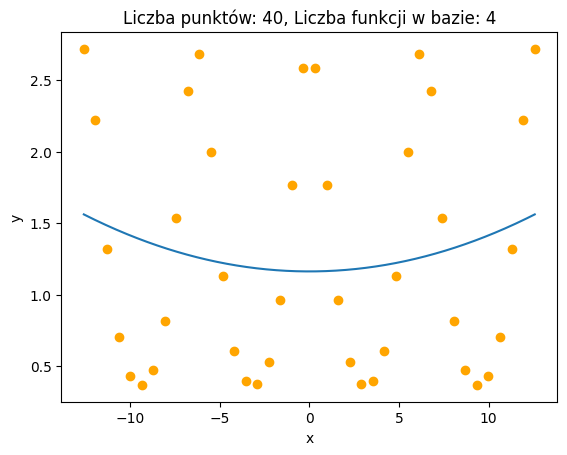

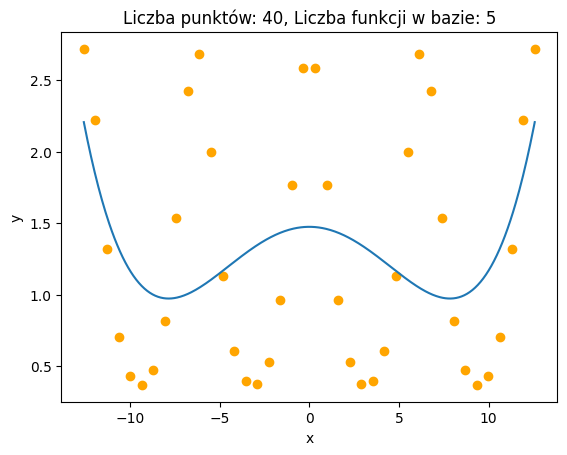

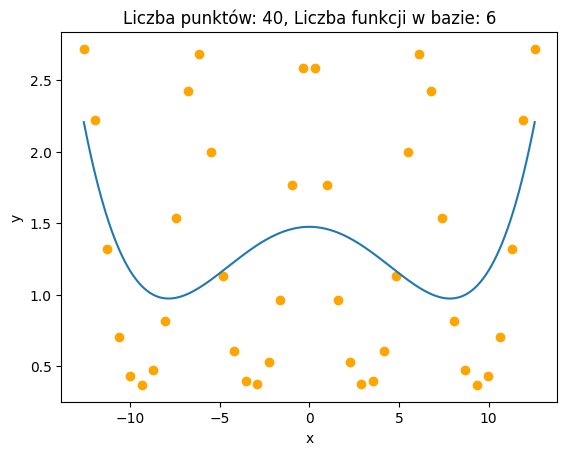

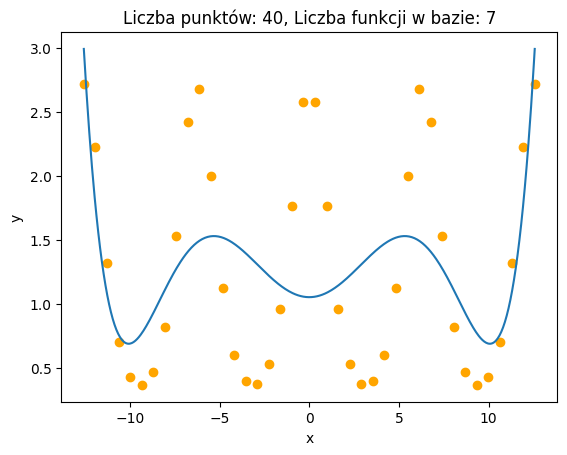

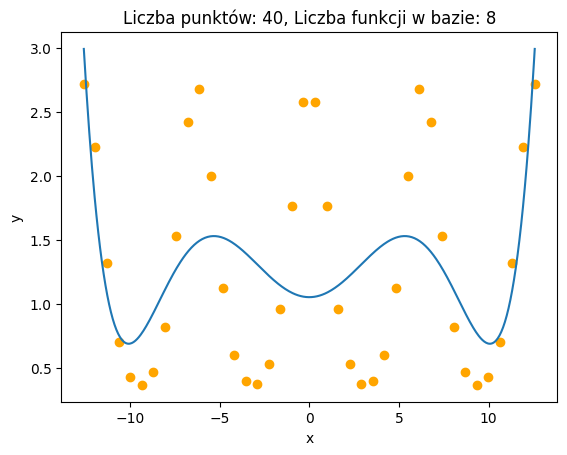

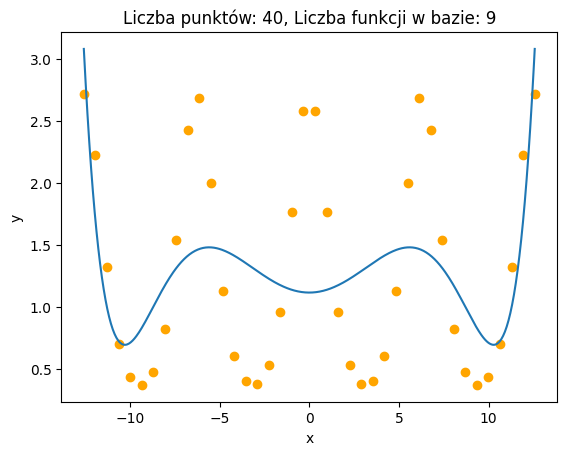

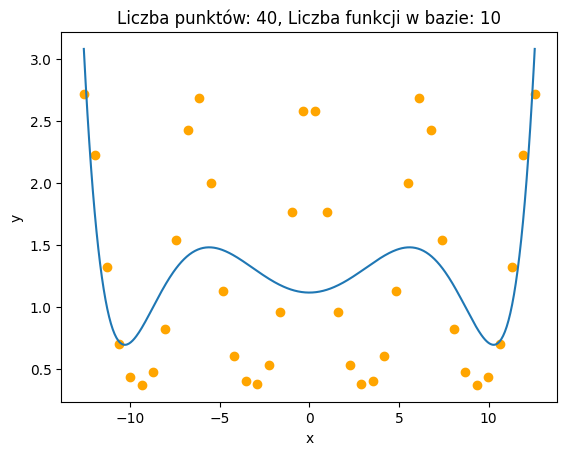

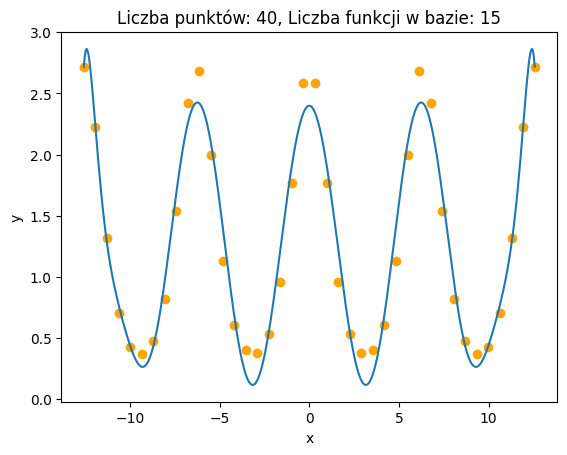

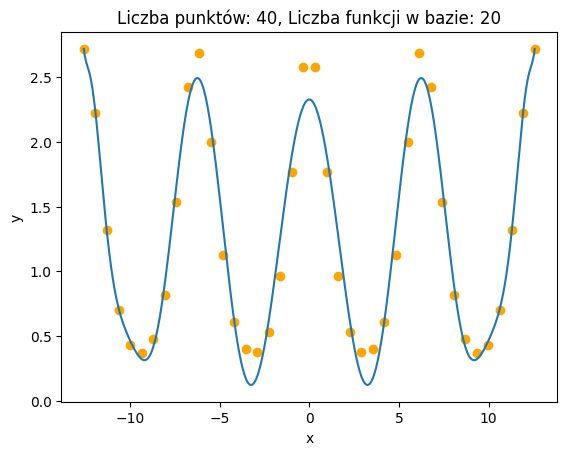

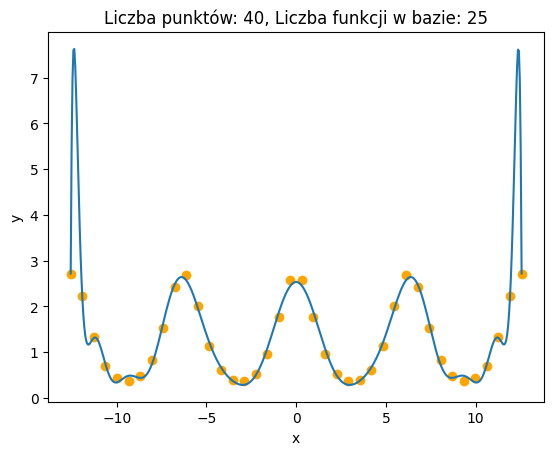

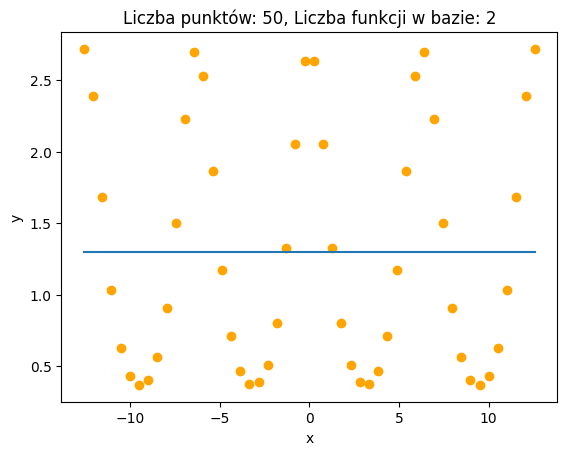

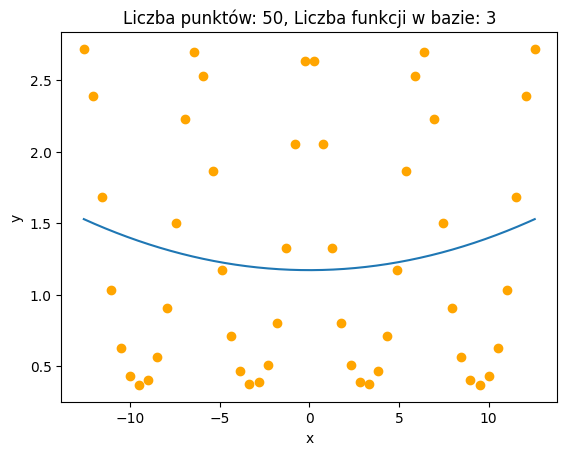

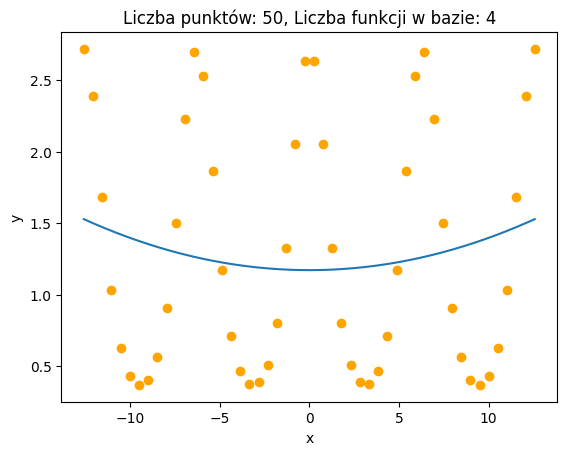

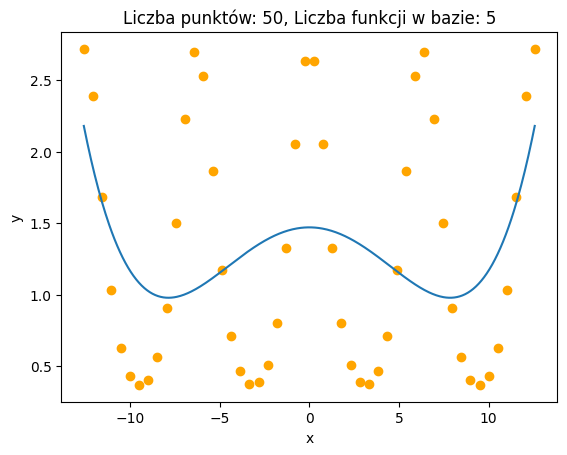

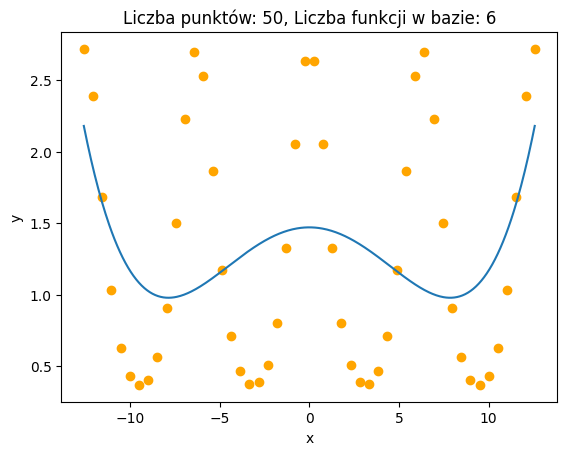

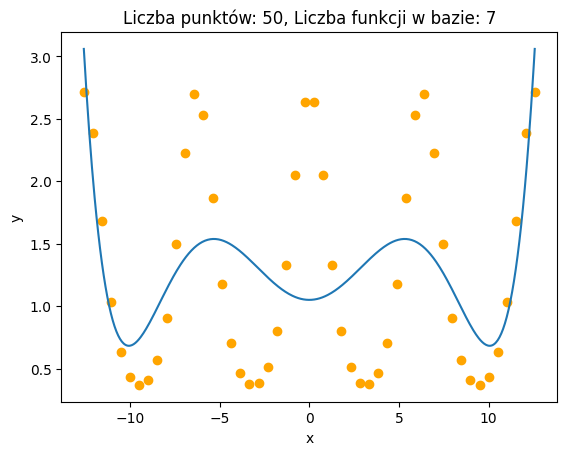

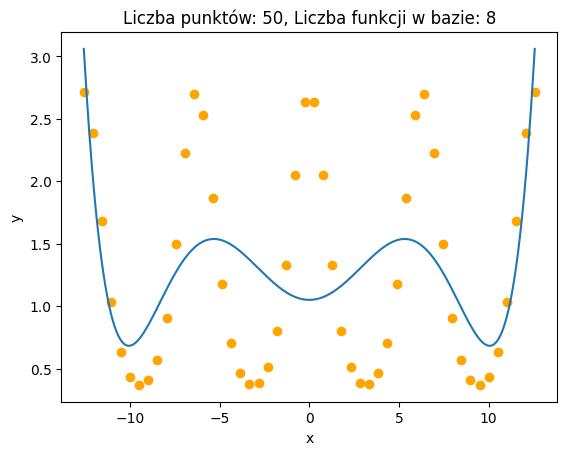

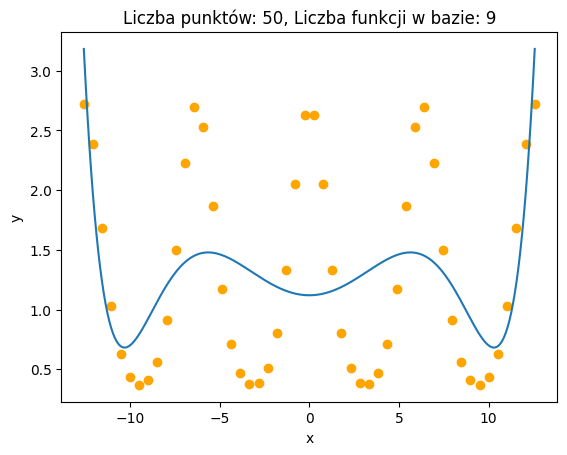

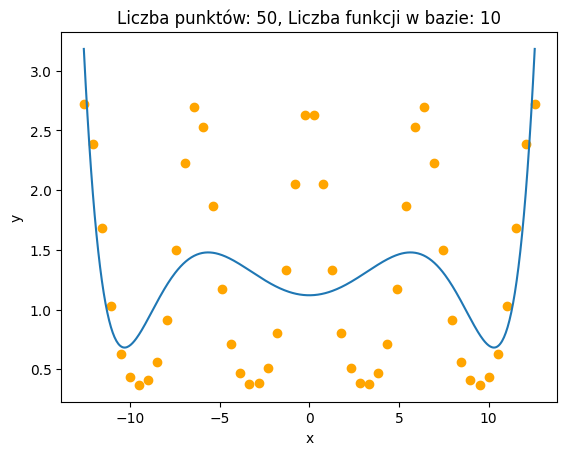

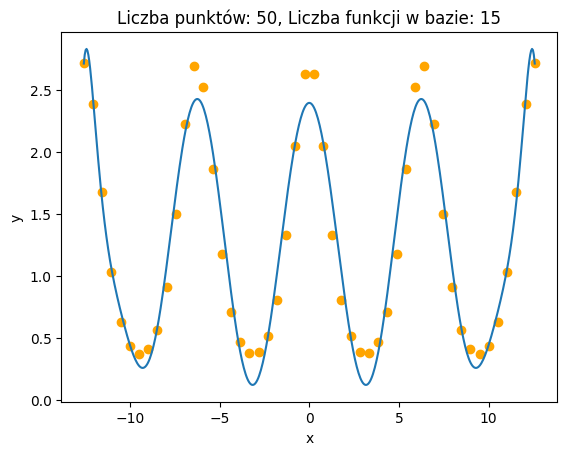

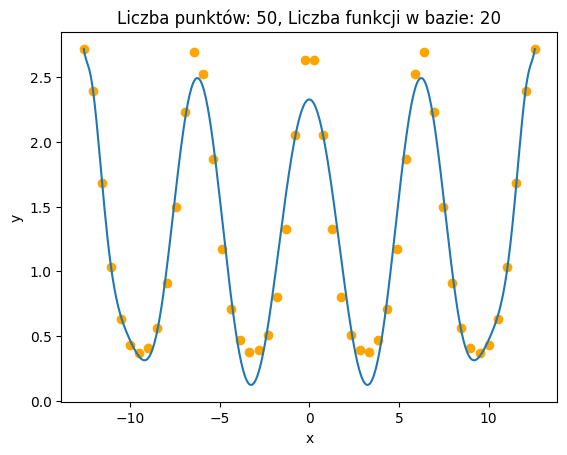

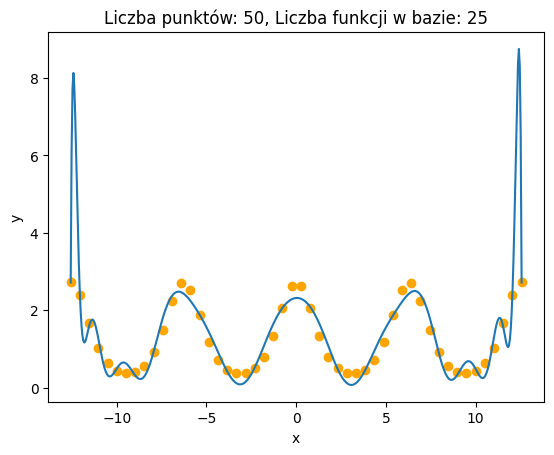

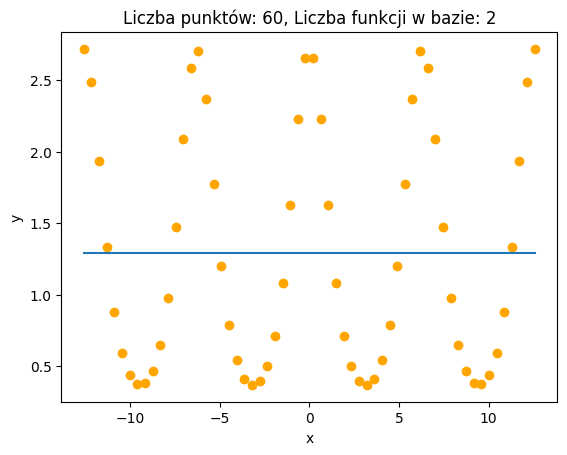

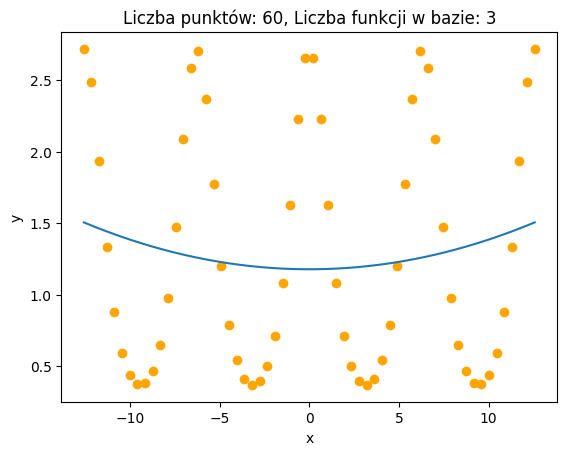

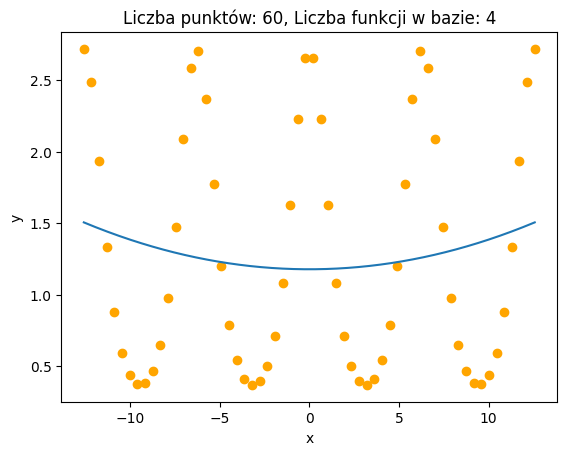

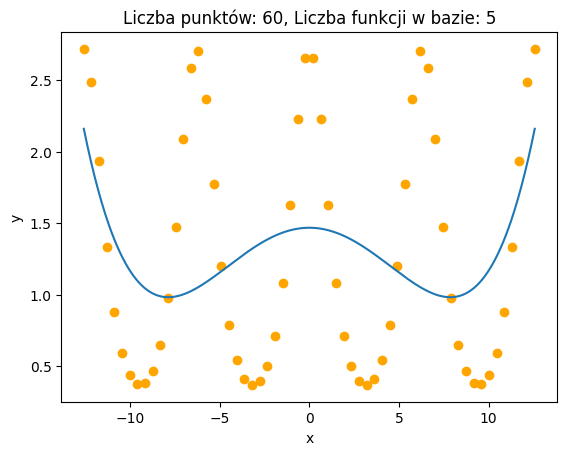

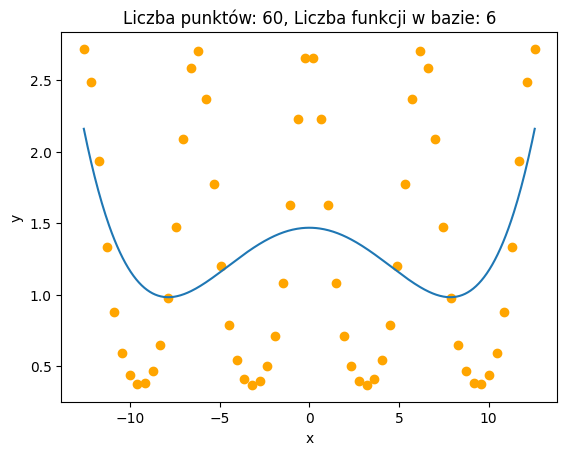

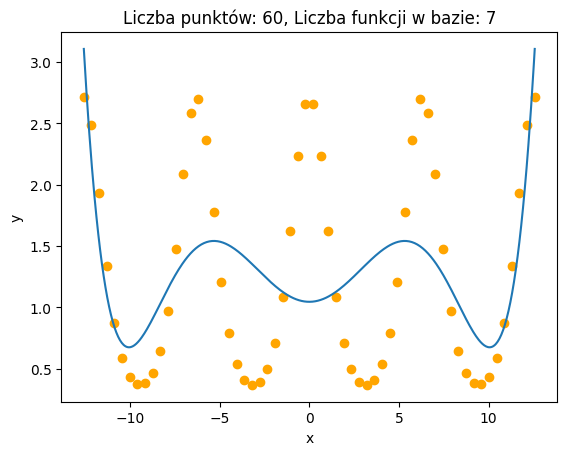

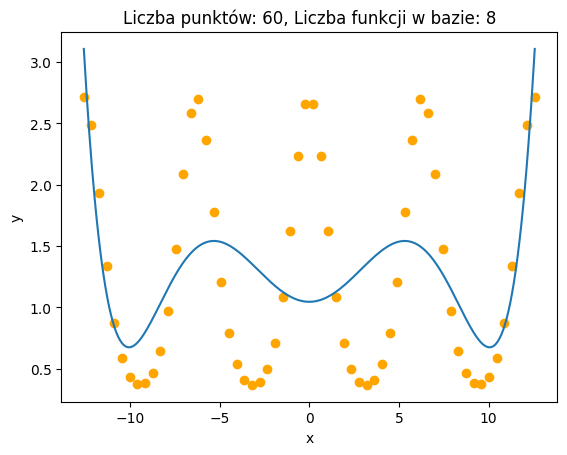

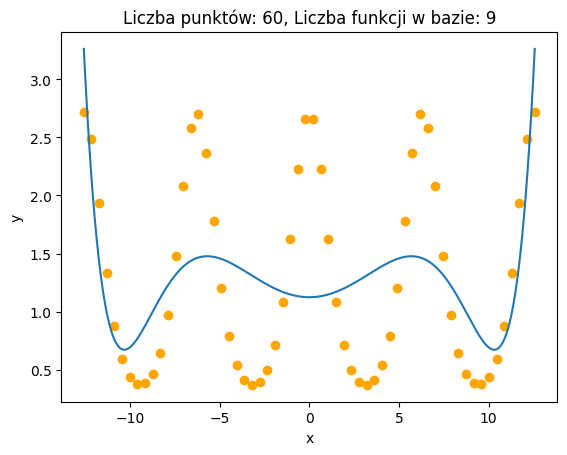

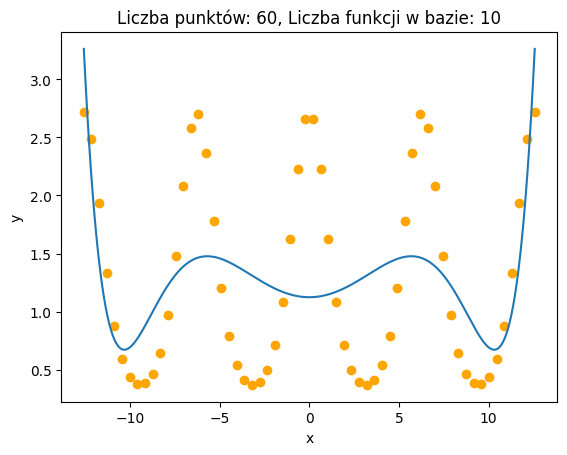

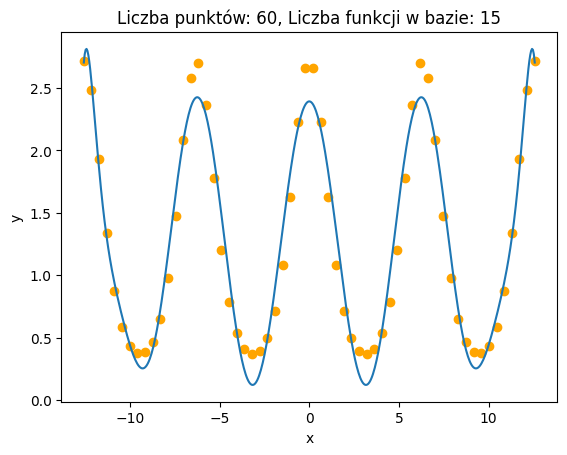

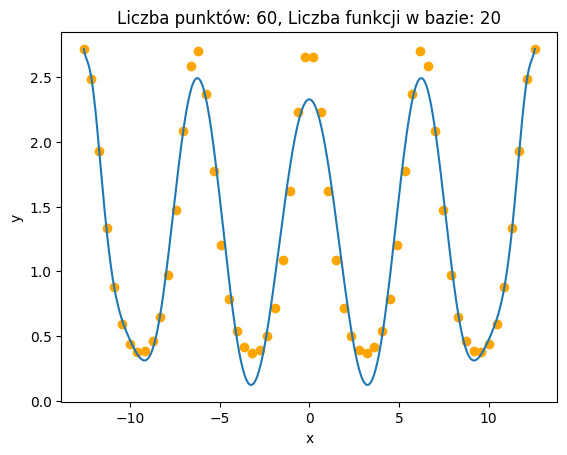

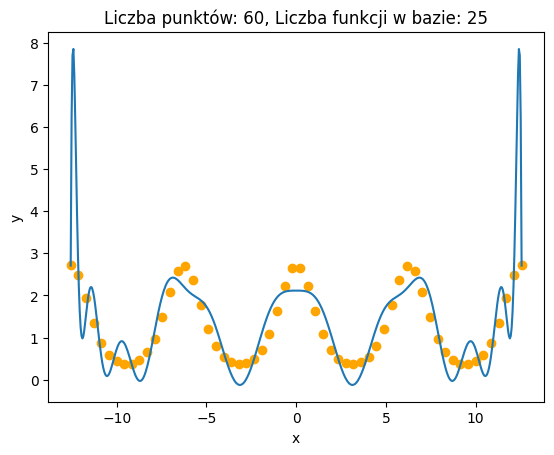

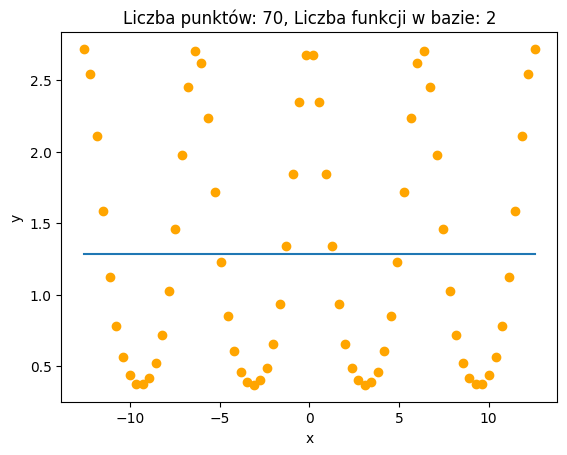

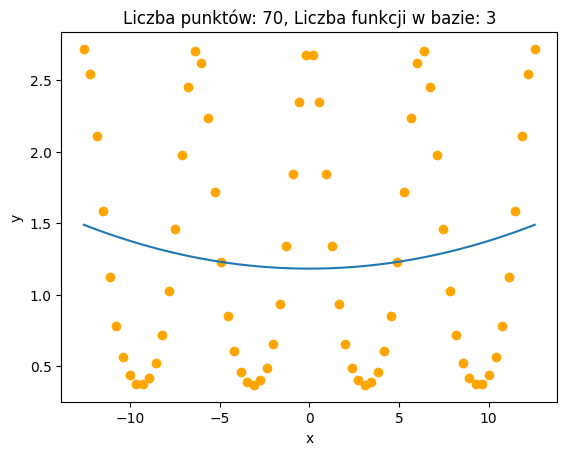

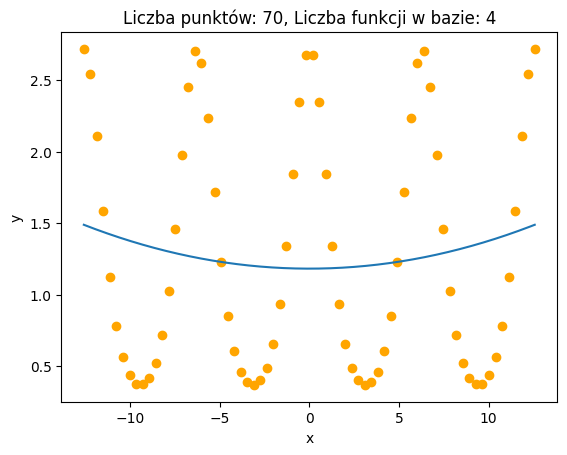

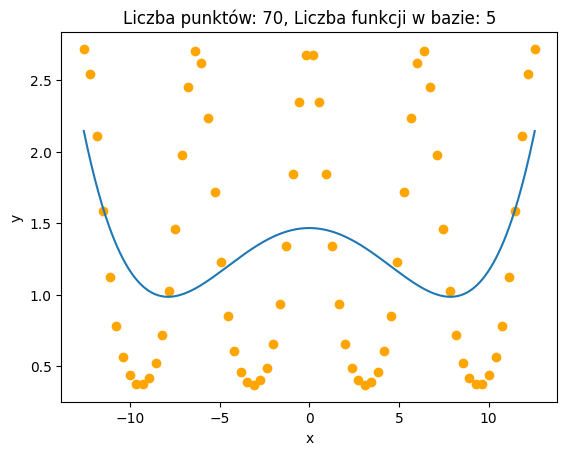

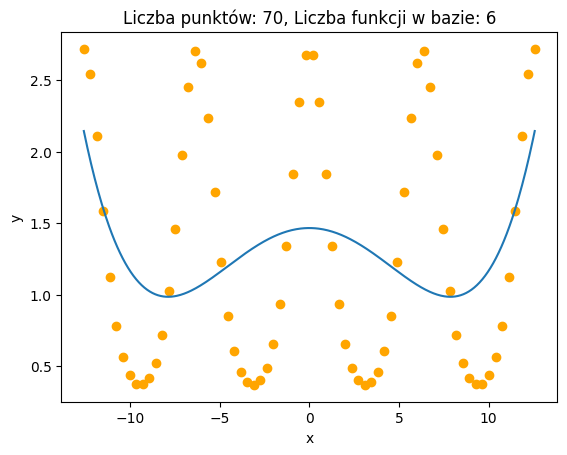

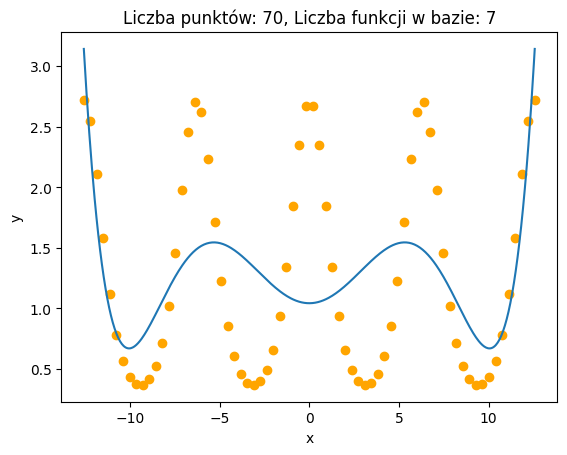

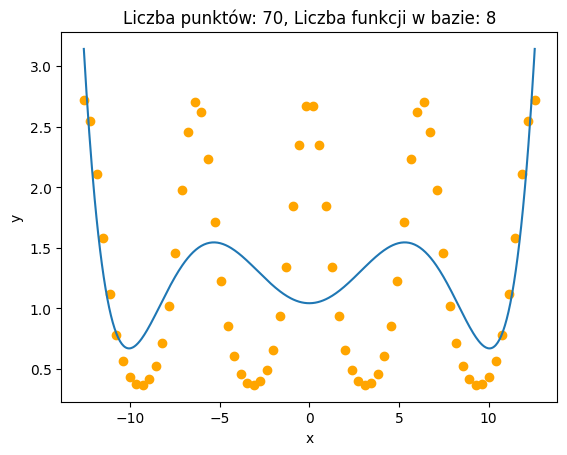

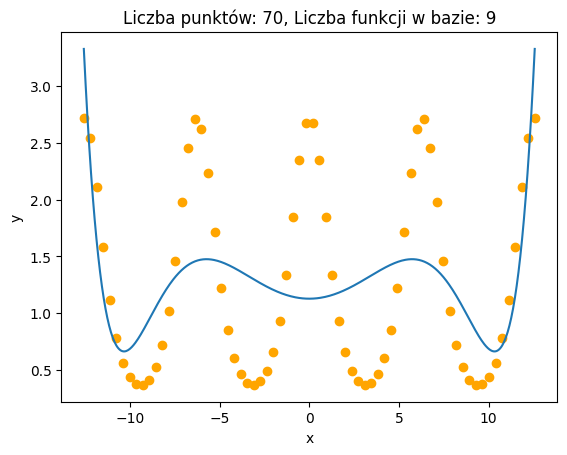

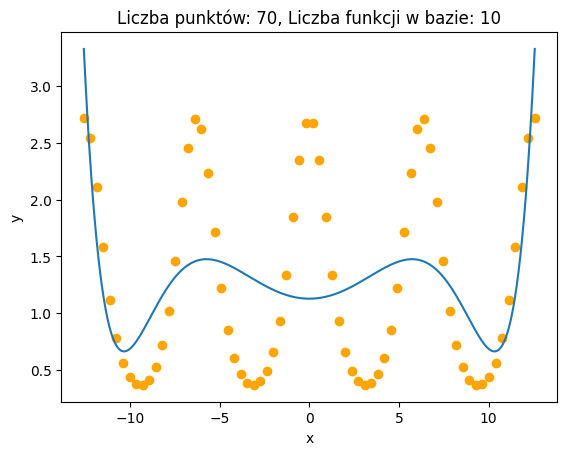

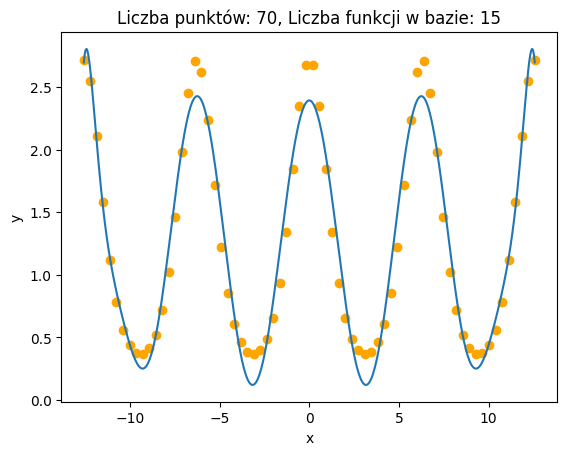

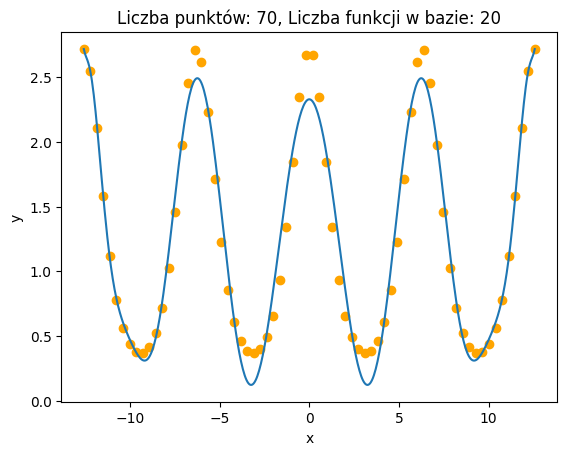

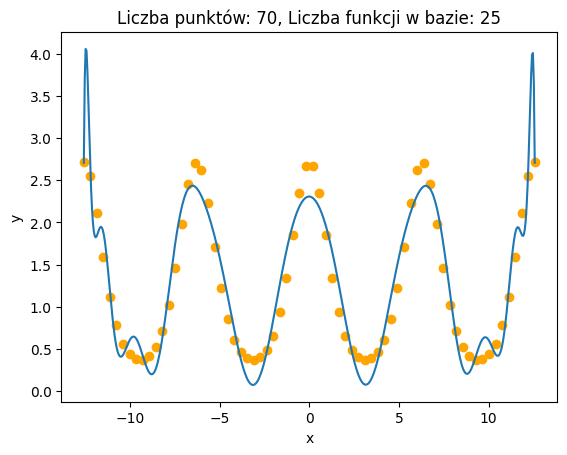

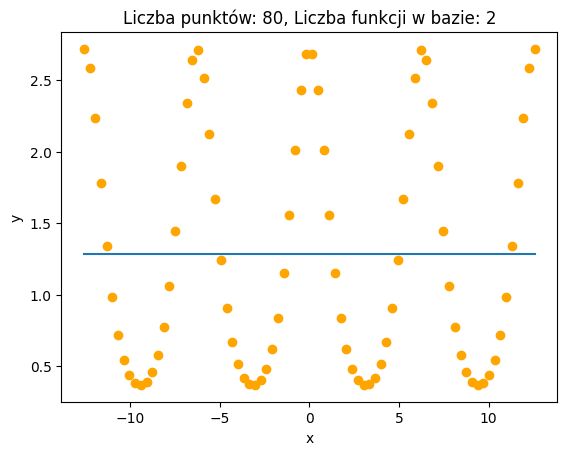

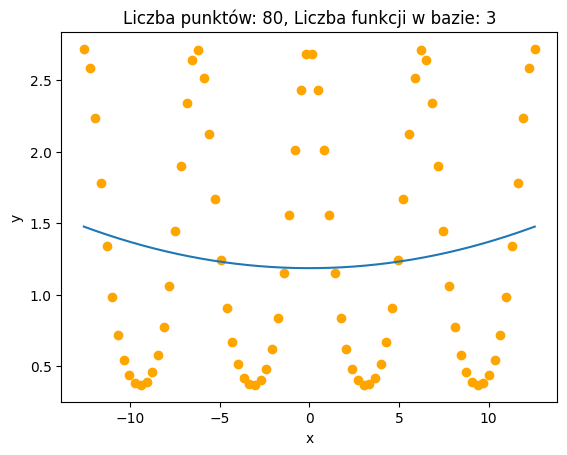

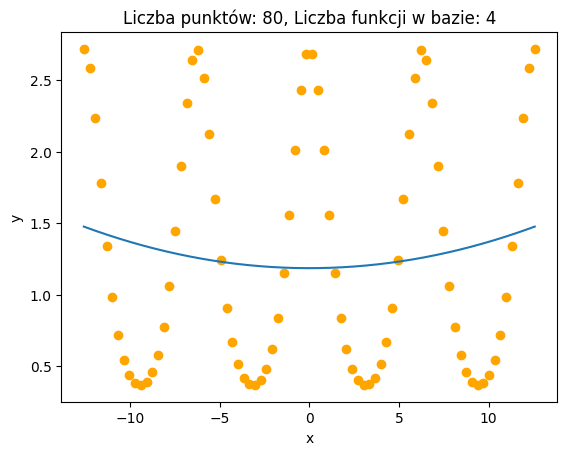

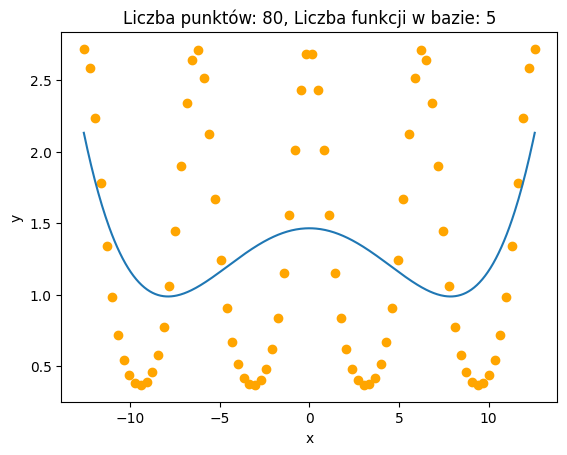

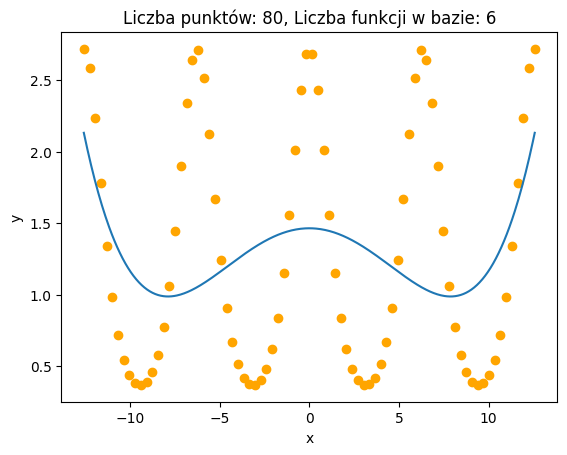

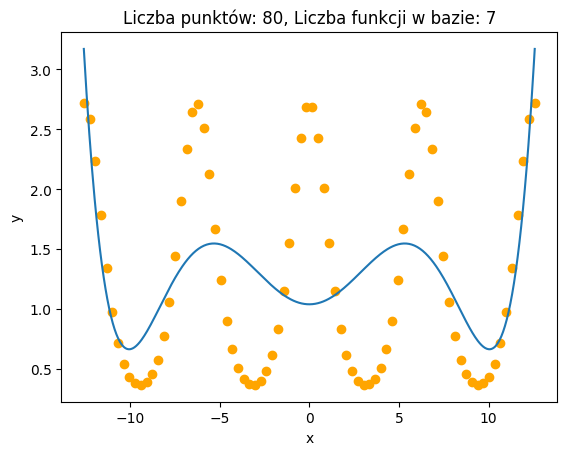

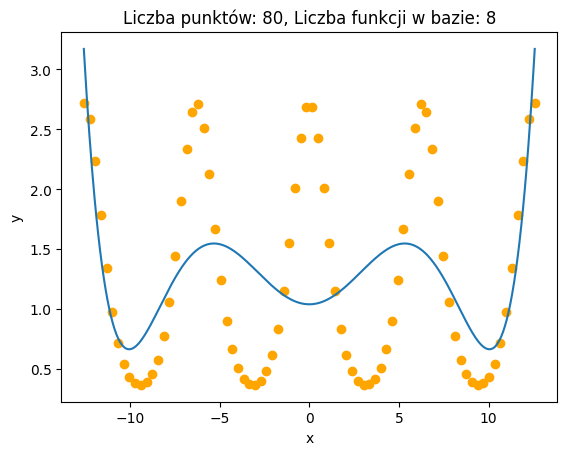

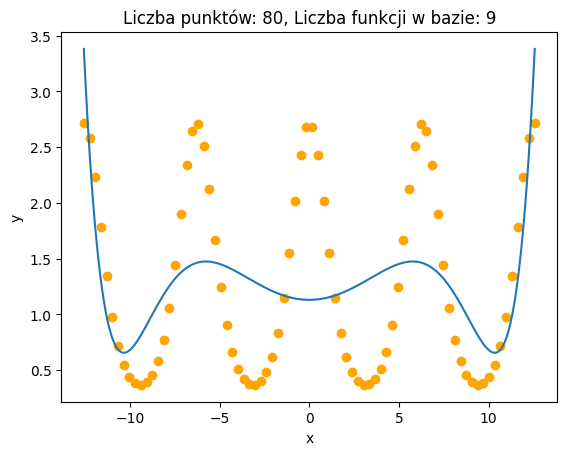

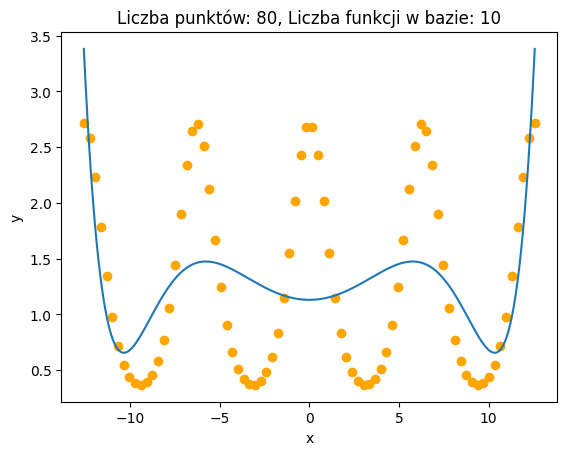

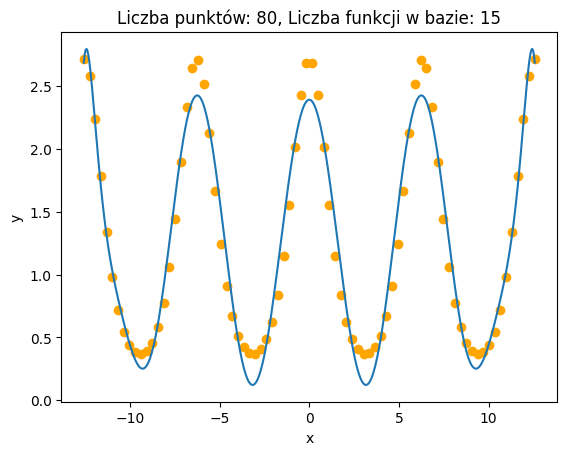

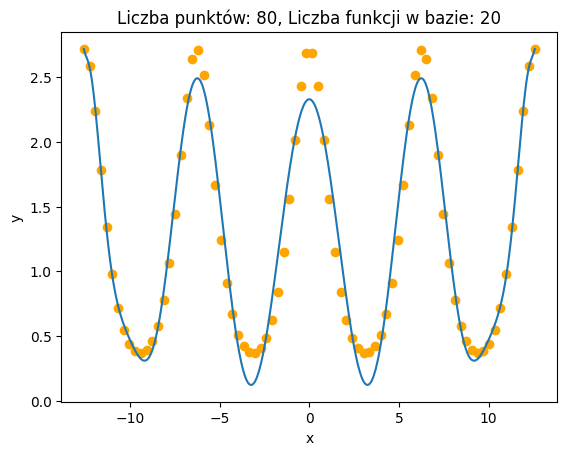

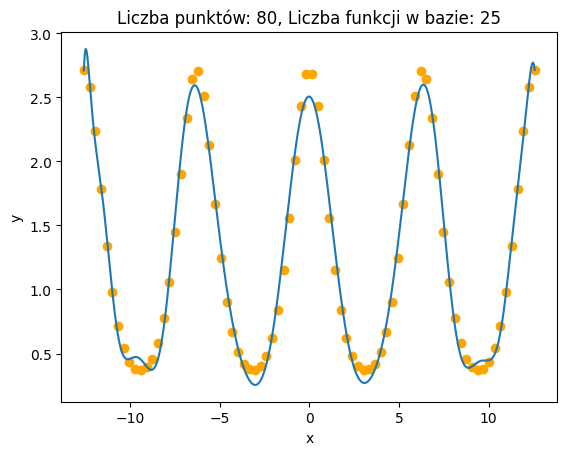

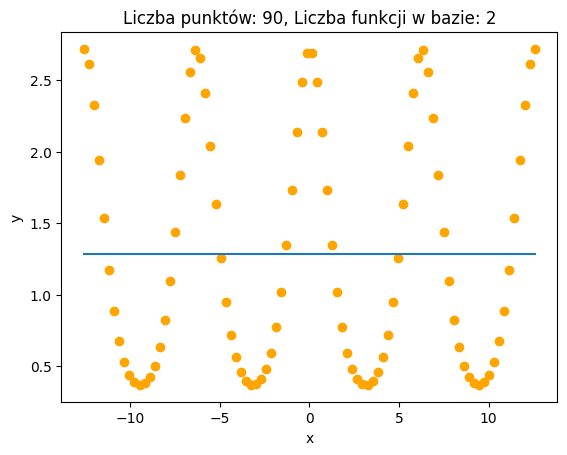

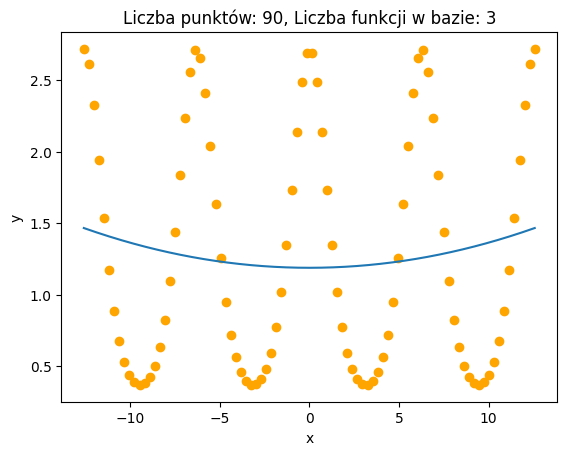

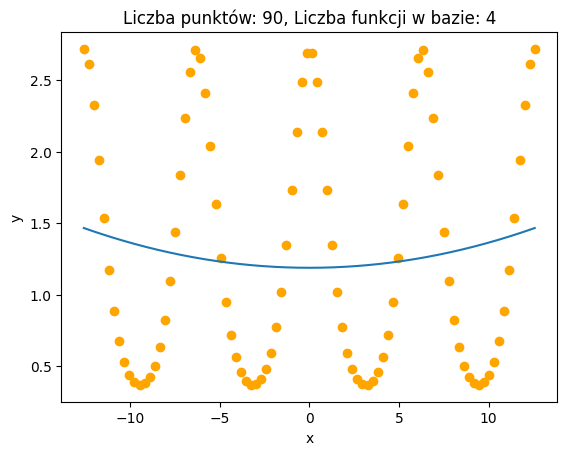

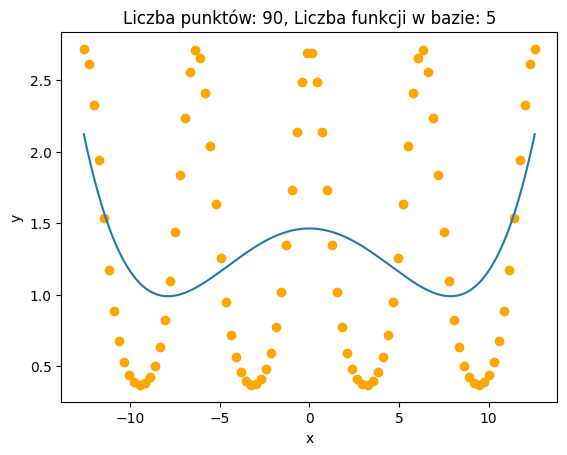

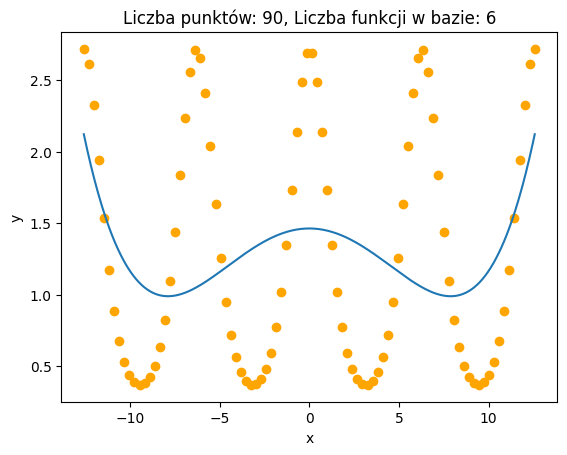

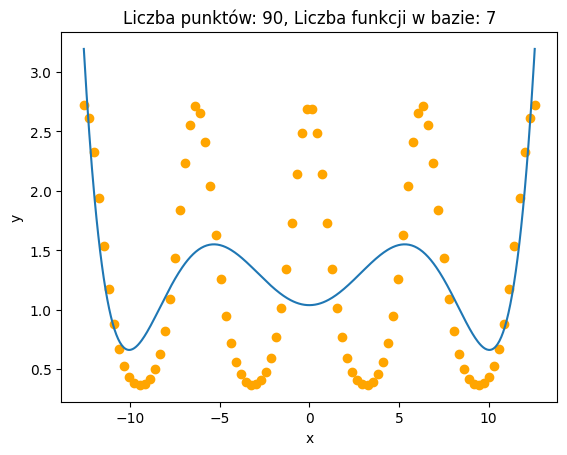

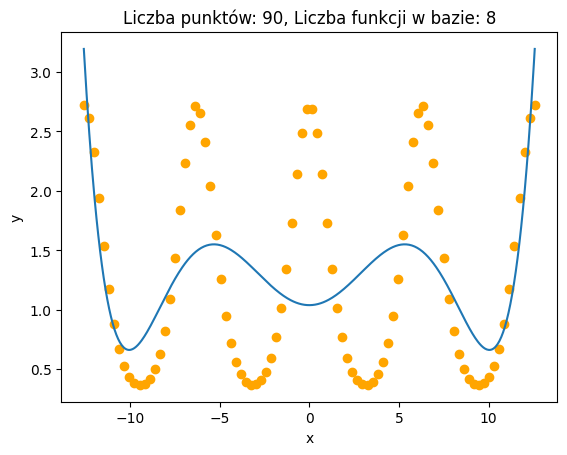

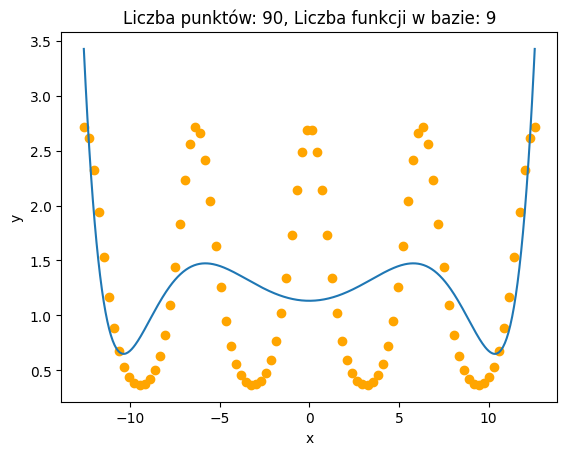

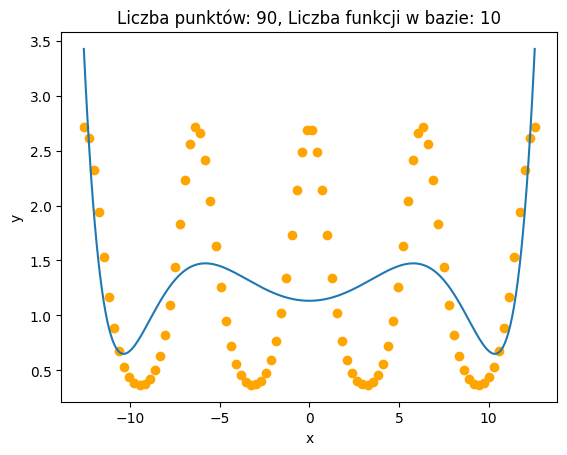

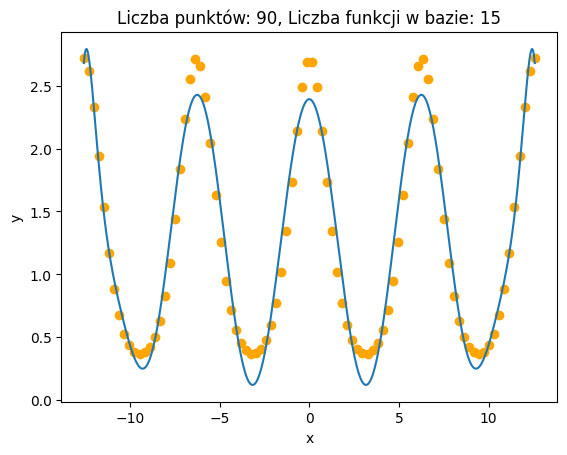

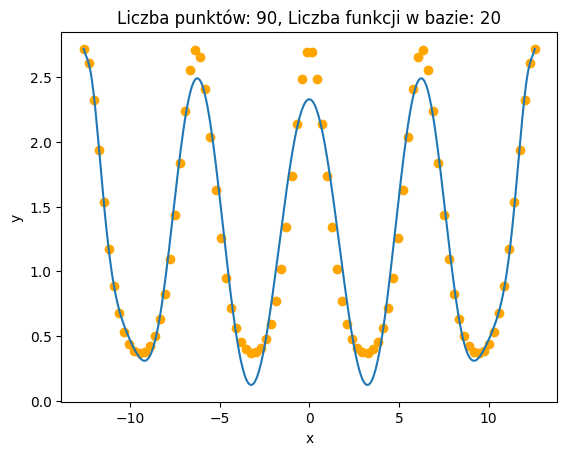

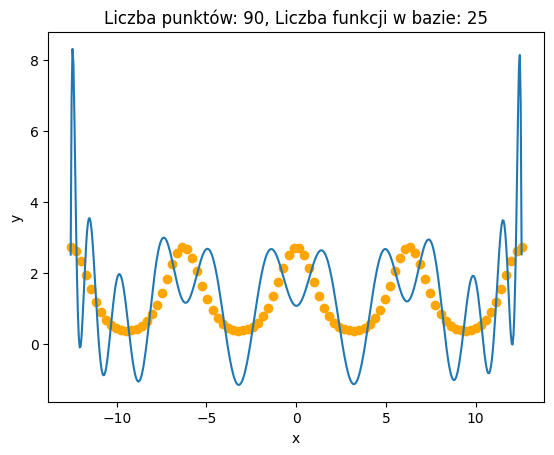

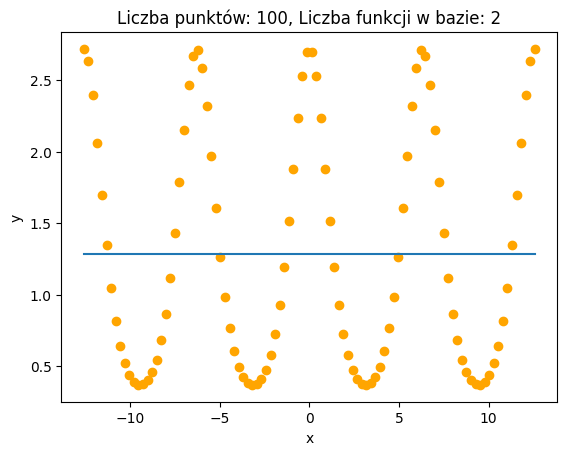

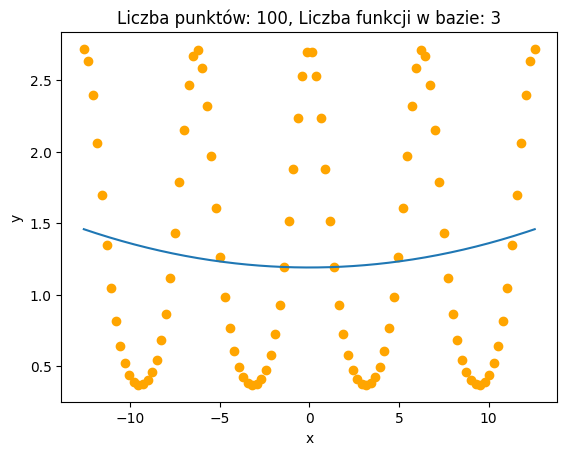

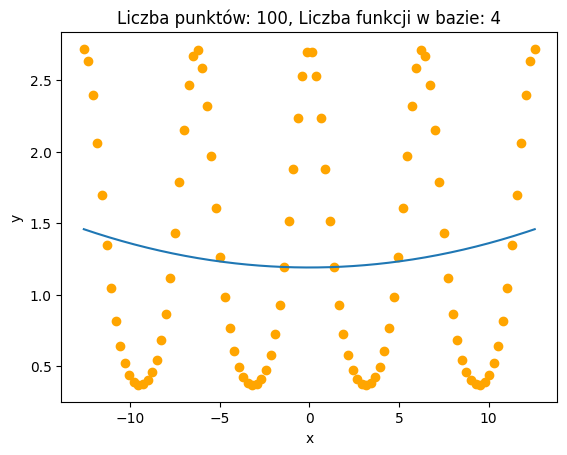

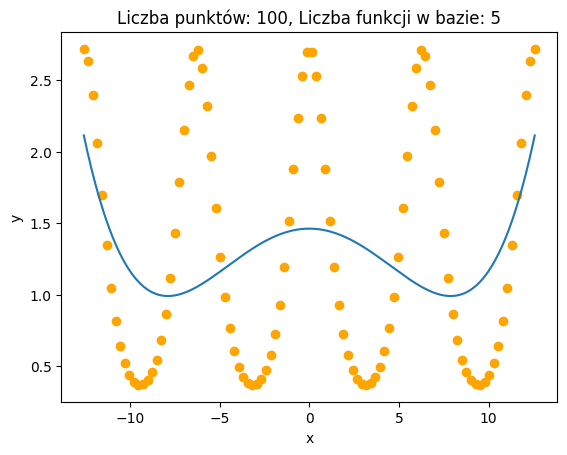

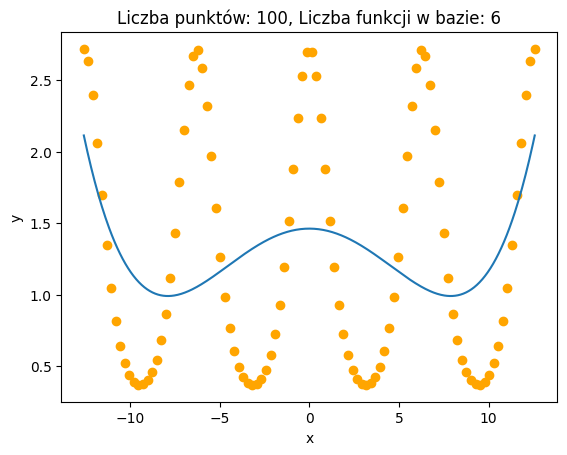

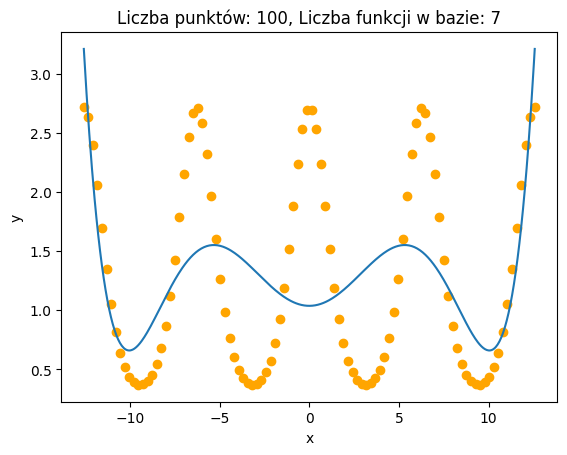

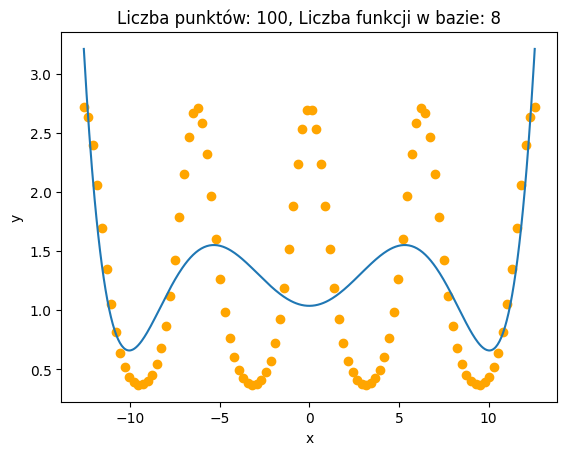

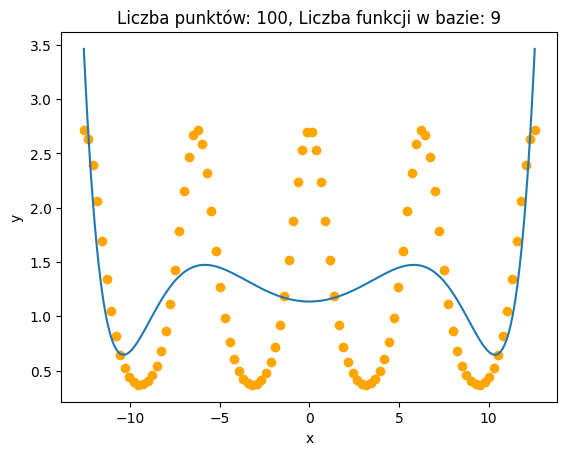

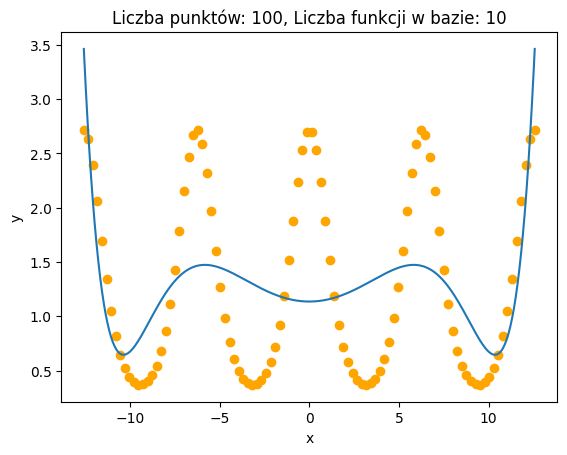

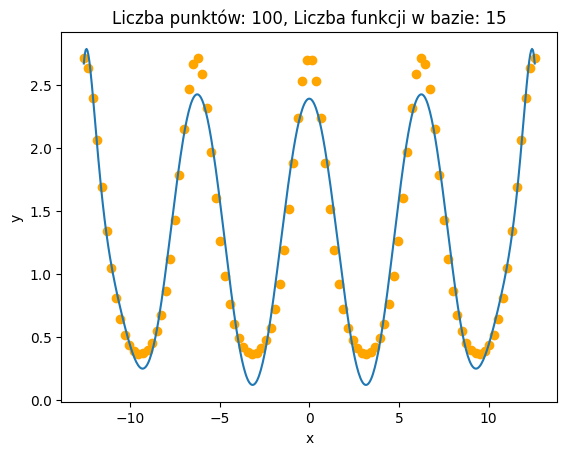

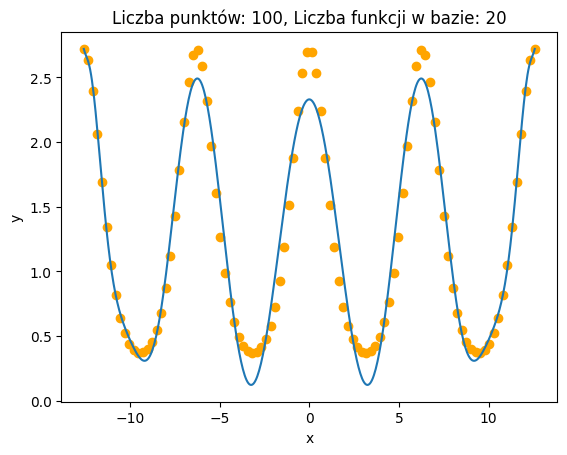

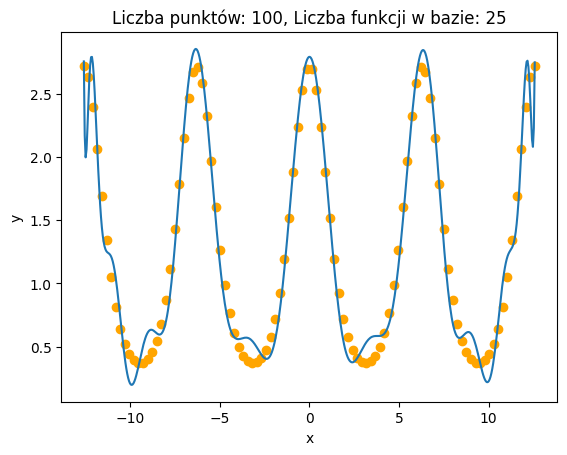

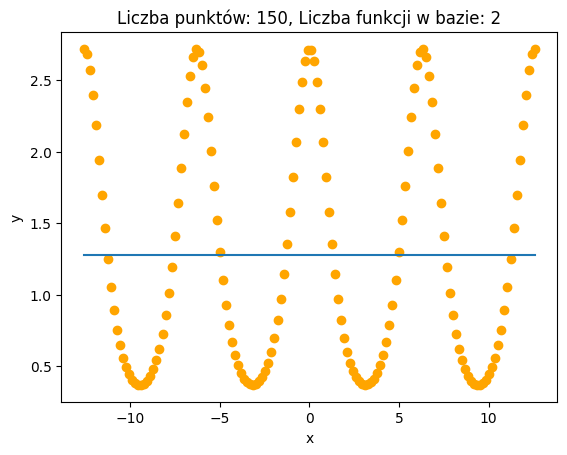

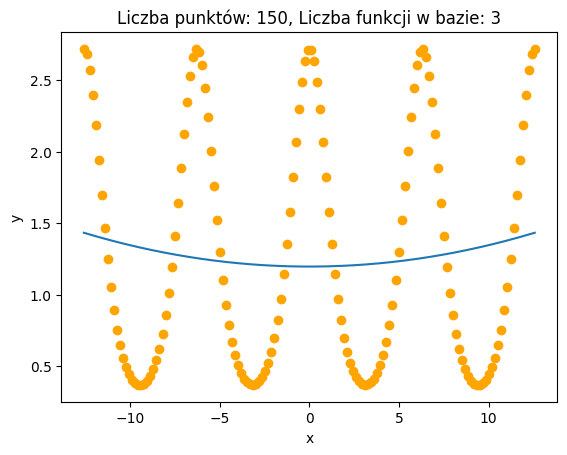

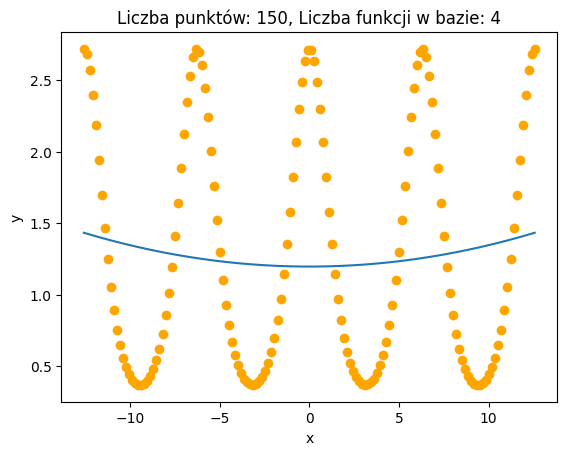

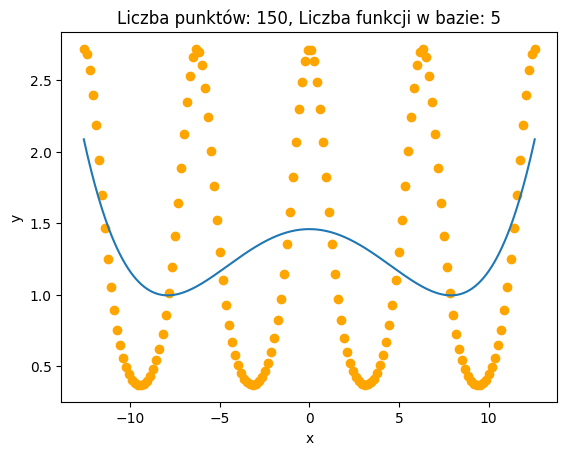

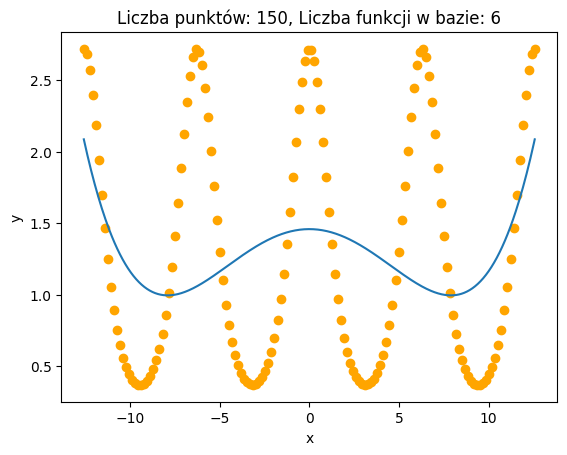

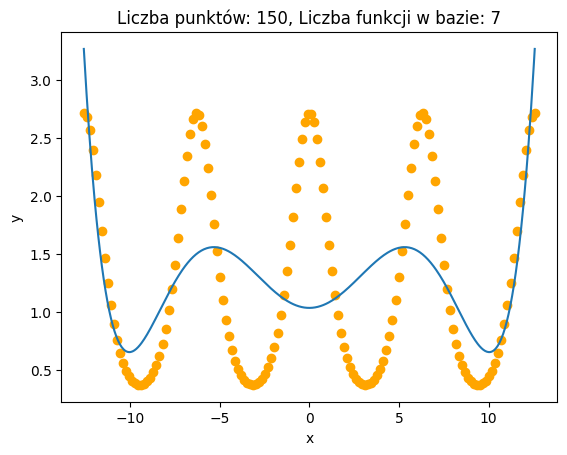

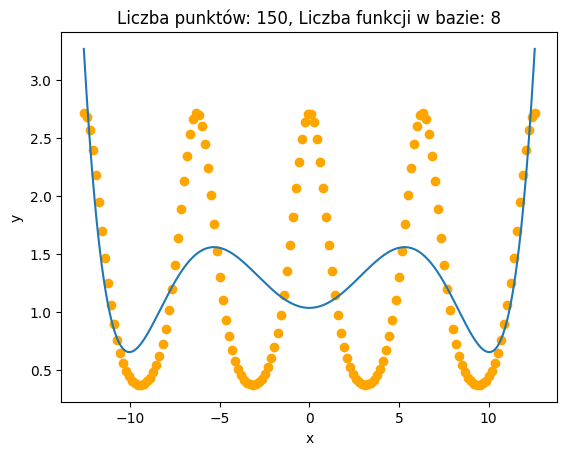

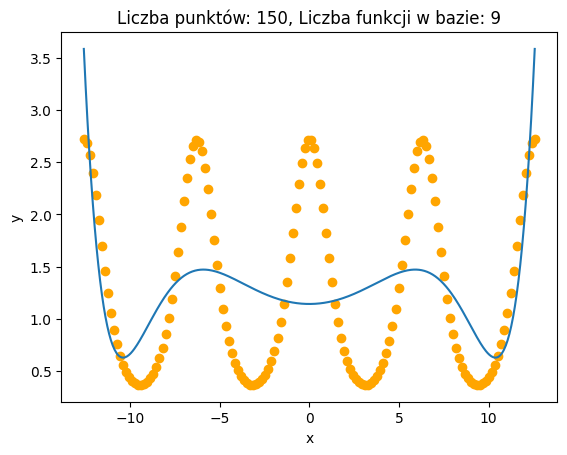

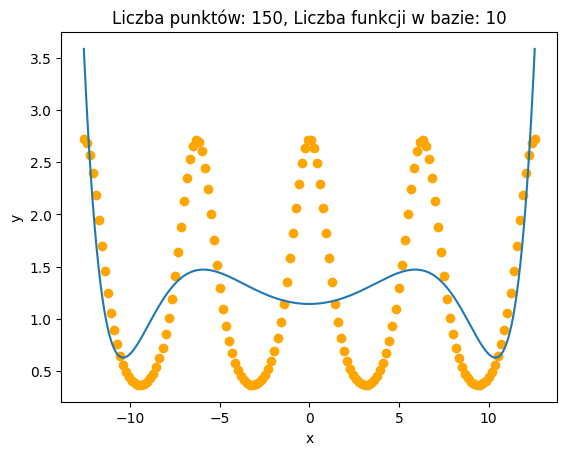

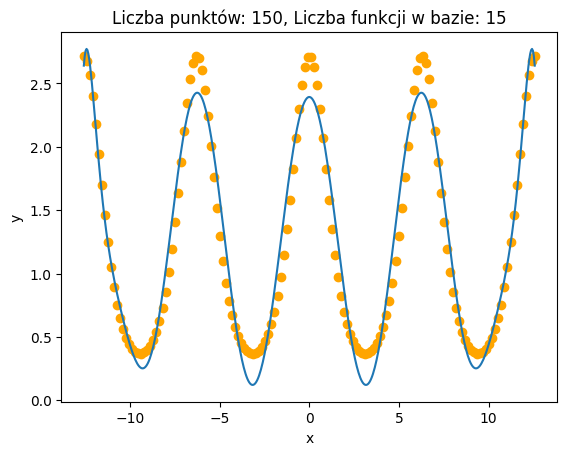

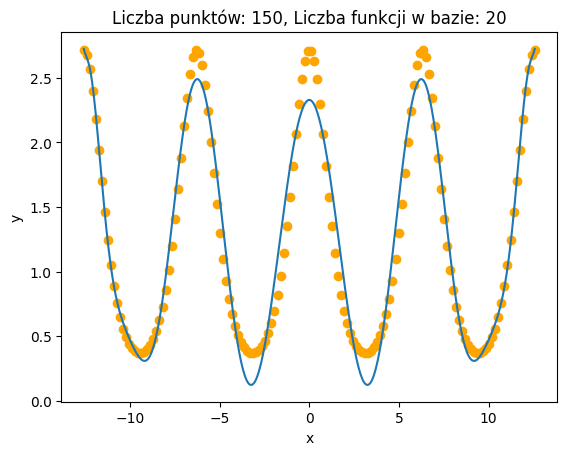

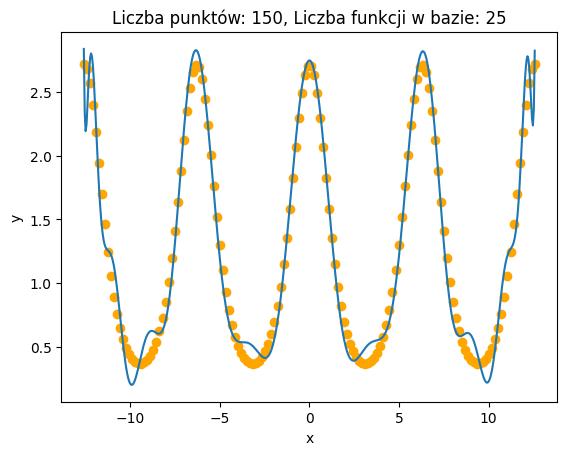

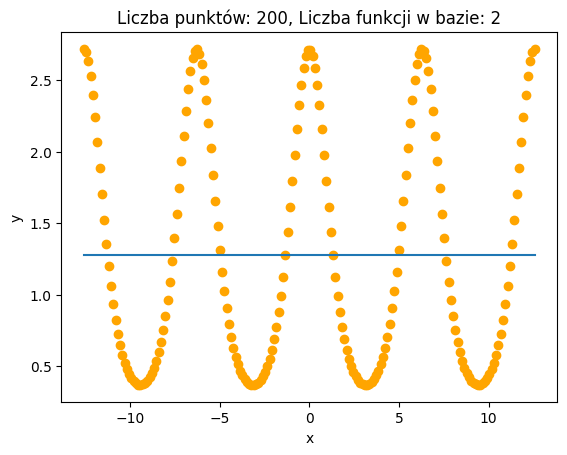

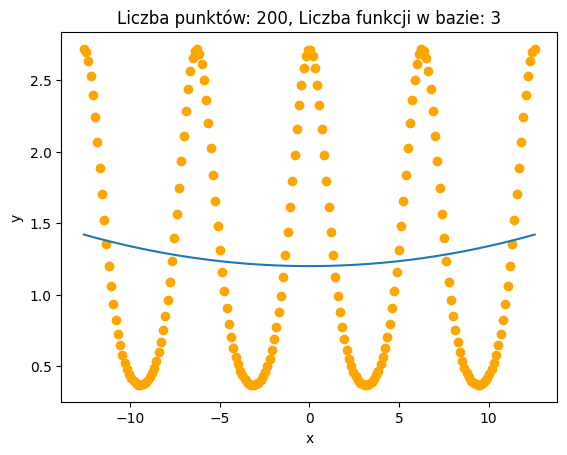

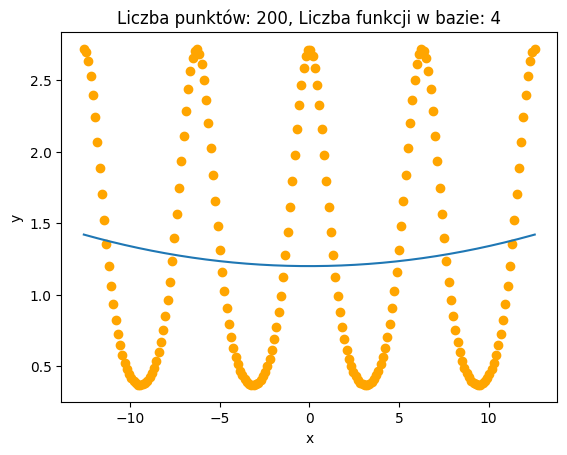

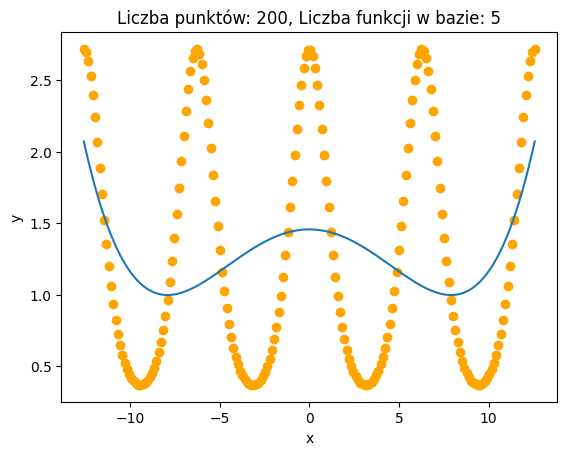

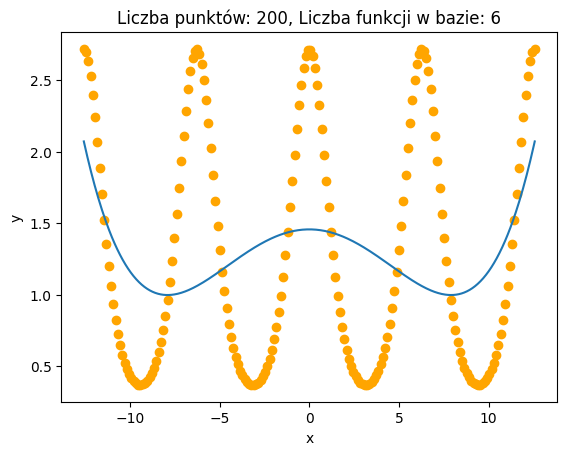

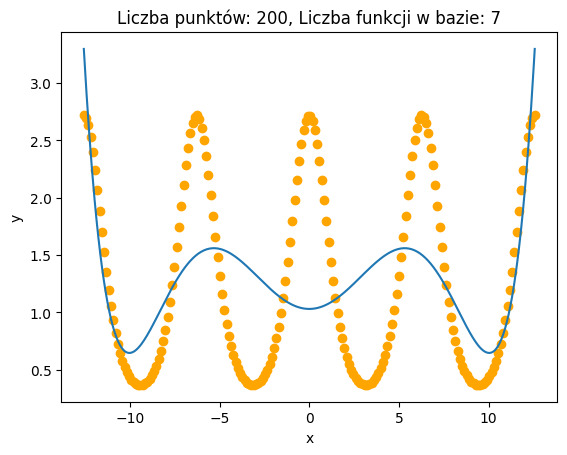

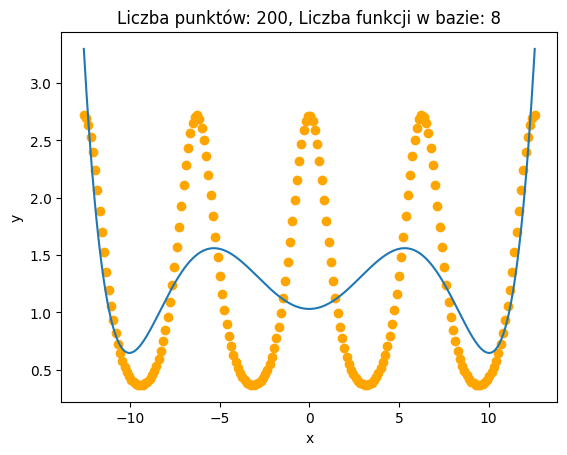

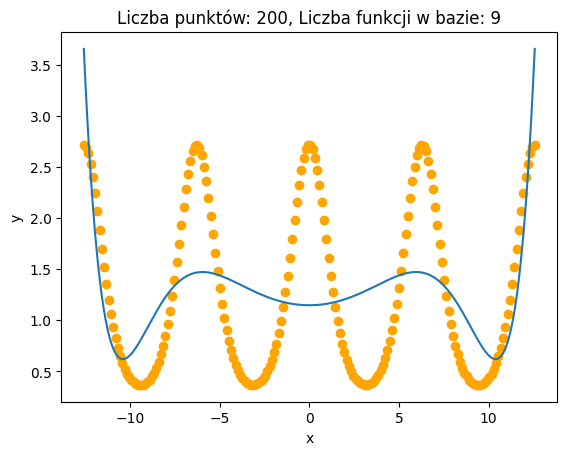

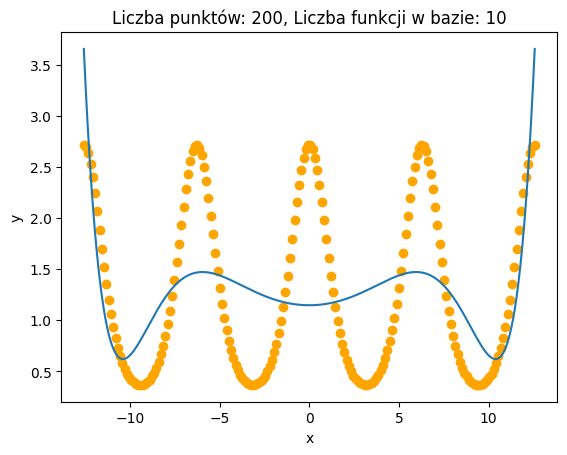

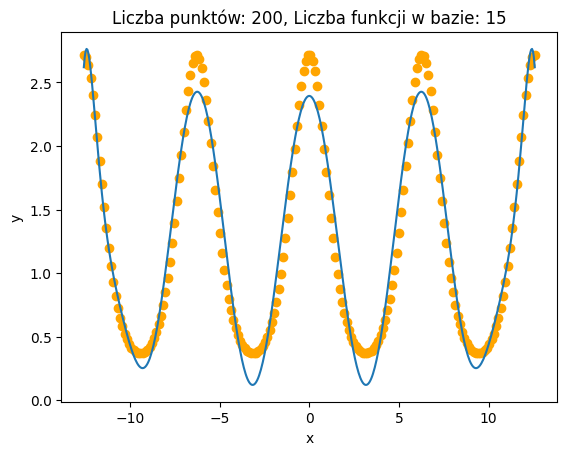

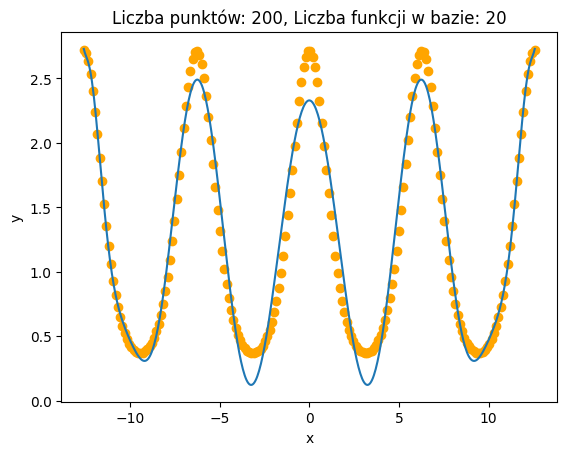

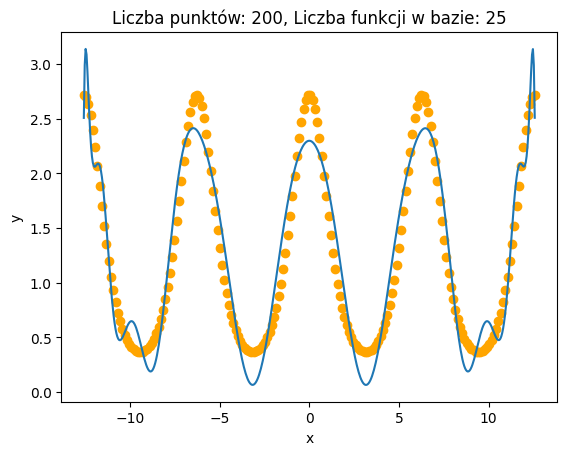

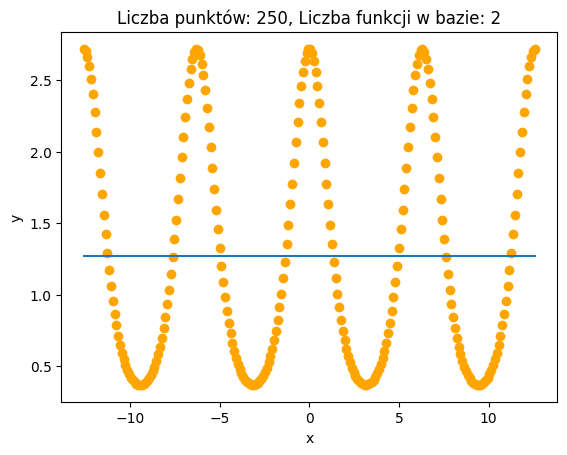

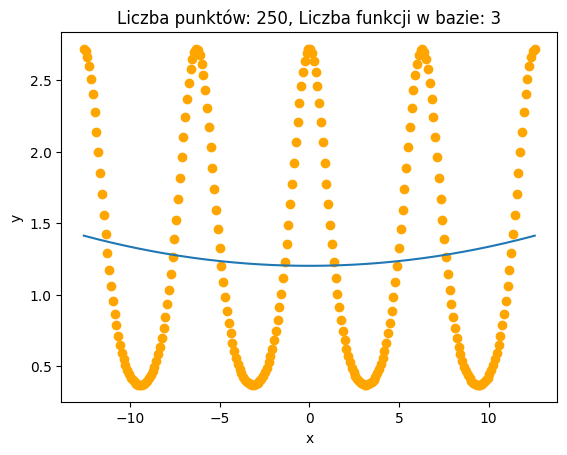

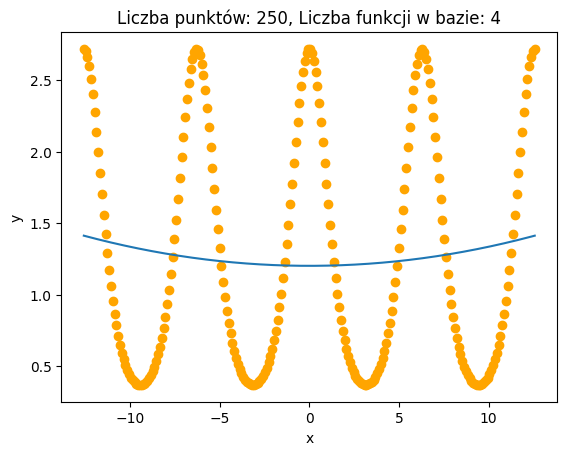

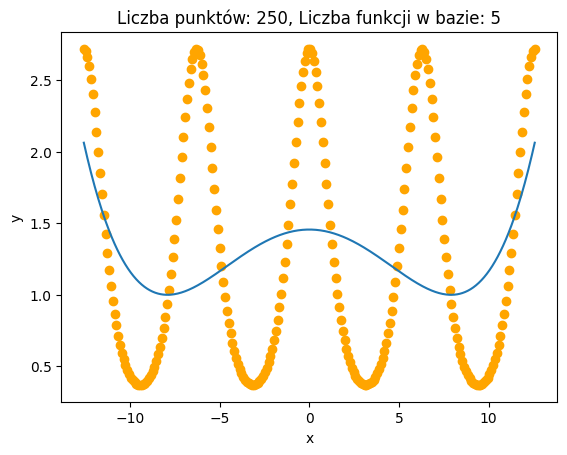

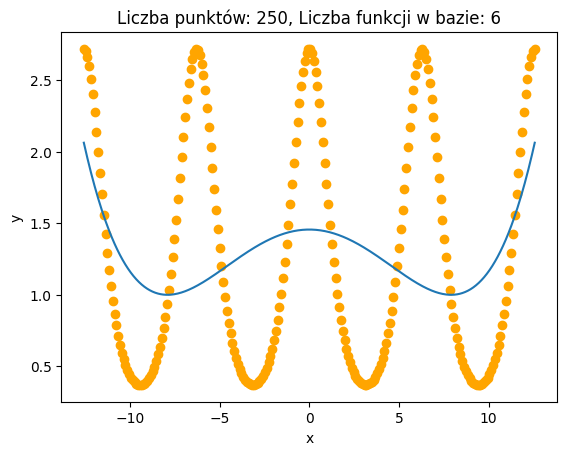

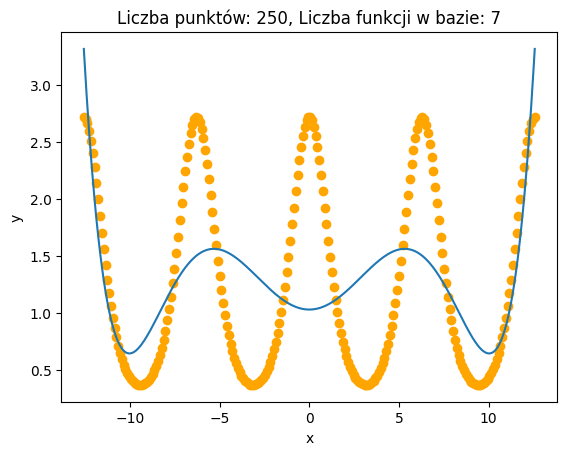

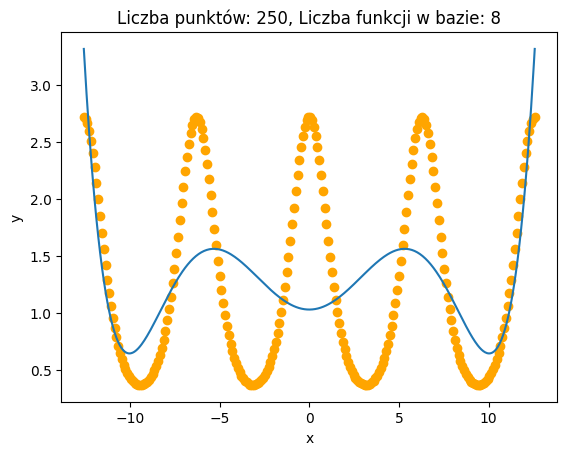

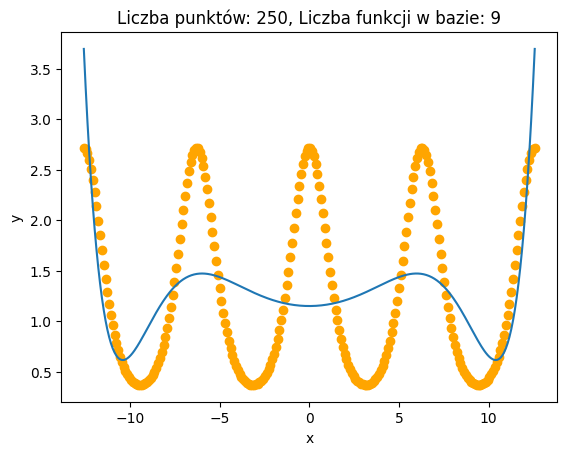

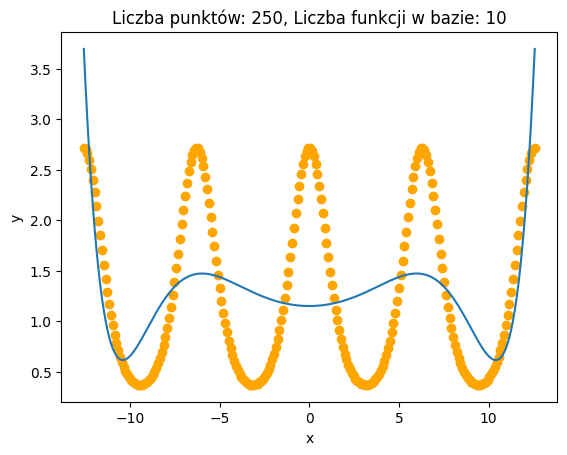

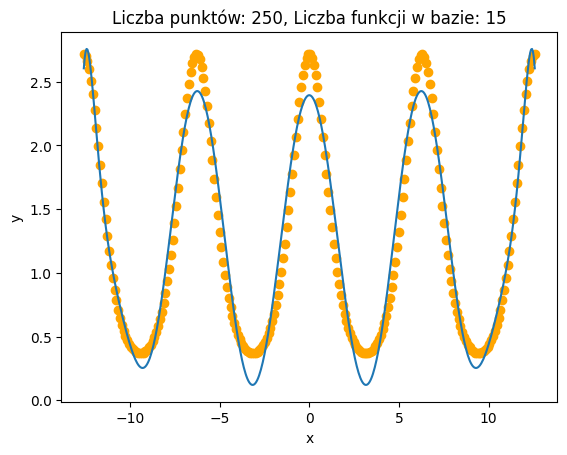

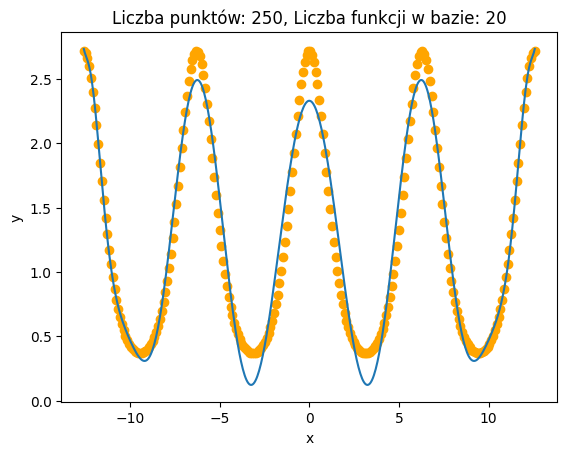

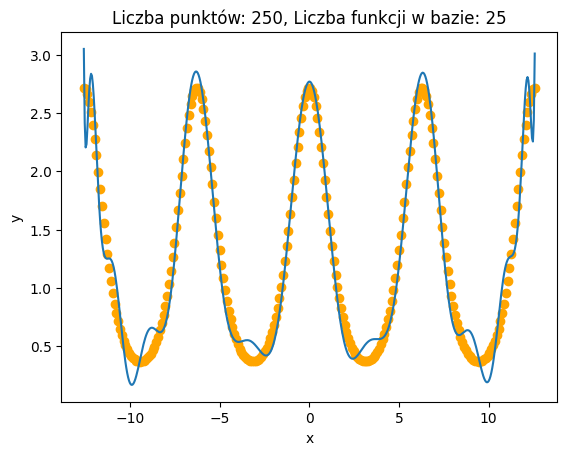

In [17]:
points = list(range(10, 101, 10)) + list(range(150, 251, 50))
functions = list(range(2, 11)) + list(range(15, 26, 5))
header = ["liczba punktów\\liczba funkcji", *functions]
max_errors.append(header)
std_errors.append(header)
for no_points in points:
    max_errors.append([no_points])
    std_errors.append([no_points])
    for no_functions in functions:
        test_approximation(no_points, no_functions)

In [22]:
def format_output(output) -> str:
    if type(output) == int:
        return str(output)

    if type(output) == str:
        return output
    else:
        return f"{output:.5f}"

for row in max_errors:
    print(",".join(map(format_output, row)))


print("-------------------------------")

for row in std_errors:
    print(",".join(map(format_output, row)))

liczba punktów\liczba funkcji,2,3,4,5,6,7,8,9,10,15,20,25
10,1.30699,1.82874,1.82874,1.74342,1.74342,2.06771,2.06771,4.18198,4.18198,638.27846,16.94914,41.02993
20,1.37961,1.59637,1.59637,1.70455,1.70455,1.66188,1.66188,1.58777,1.58777,0.33295,221.39177,676.68088
30,1.40381,1.56872,1.56872,1.68886,1.68886,1.65732,1.65732,1.60504,1.60504,0.31183,0.38141,69.72717
40,1.41591,1.55475,1.55475,1.68184,1.68184,1.66274,1.66274,1.60278,1.60278,0.31865,0.39015,4.96443
50,1.42317,1.54608,1.54608,1.67725,1.67725,1.66764,1.66764,1.59801,1.59801,0.32243,0.38984,6.06551
60,1.42801,1.54015,1.54015,1.67394,1.67394,1.67145,1.67145,1.59354,1.59354,0.32419,0.38915,5.16416
70,1.43147,1.53584,1.53584,1.67142,1.67142,1.67438,1.67438,1.58975,1.58975,0.32498,0.38867,1.35284
80,1.43406,1.53256,1.53256,1.66943,1.66943,1.67667,1.67667,1.58659,1.58659,0.32530,0.38835,0.21143
90,1.43608,1.52999,1.52999,1.66783,1.66783,1.67852,1.67852,1.58394,1.58394,0.32539,0.38815,5.59743
100,1.43769,1.52791,1.52791,1.66651,1.6665